<a href="https://colab.research.google.com/github/RozhanoHashemi/smart_environments_lesson/blob/main/miniproject_2_rozhano/code2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1-PART3



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

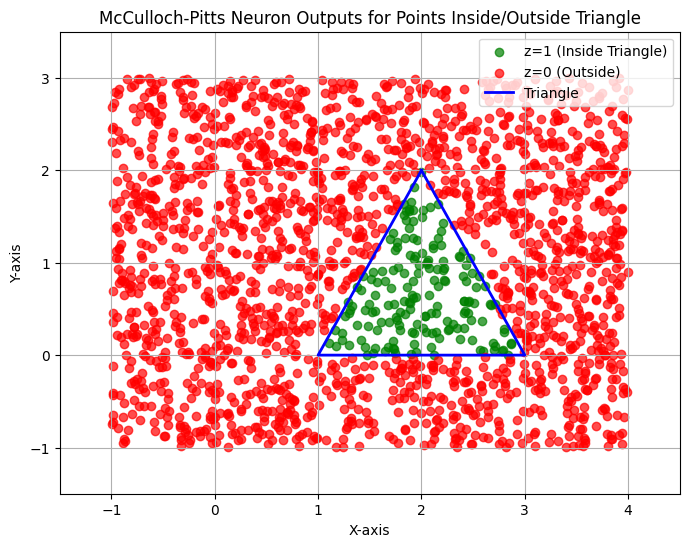

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f_BC(x, y): return y
def f_AB(x, y): return 6 - 2 * x - y
def f_AC(x, y): return 2 * x - y - 2


def step_func(s): return 1 if s >= 0 else 0


def neuron_BC(x, y): return step_func(f_BC(x, y))
def neuron_AB(x, y): return step_func(f_AB(x, y))
def neuron_AC(x, y): return step_func(f_AC(x, y))


def final_neuron(x, y):
    z_bc, z_ab, z_ac = neuron_BC(x, y), neuron_AB(x, y), neuron_AC(x, y)
    s = z_bc + z_ab + z_ac - 2.5
    return step_func(s)


N = 2000
x_min, x_max, y_min, y_max = -1, 4, -1, 3
xs, ys = np.random.uniform(x_min, x_max, N), np.random.uniform(y_min, y_max, N)


outputs = [final_neuron(x, y) for x, y in zip(xs, ys)]

x_in, y_in = [xs[i] for i in range(N) if outputs[i] == 1], [ys[i] for i in range(N) if outputs[i] == 1]
x_out, y_out = [xs[i] for i in range(N) if outputs[i] == 0], [ys[i] for i in range(N) if outputs[i] == 0]


plt.figure(figsize=(8, 6))
plt.scatter(x_in, y_in, c='green', marker='o', alpha=0.7, label='z=1 (Inside Triangle)')
plt.scatter(x_out, y_out, c='red', marker='o', alpha=0.7, label='z=0 (Outside)')


A, B, C = (2, 2), (3, 0), (1, 0)
triangle_x, triangle_y = [A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]]
plt.plot(triangle_x, triangle_y, 'b-', linewidth=2, label='Triangle')


plt.xlim(x_min - 0.5, x_max + 0.5)
plt.ylim(y_min - 0.5, y_max + 0.5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("McCulloch-Pitts Neuron Outputs for Points Inside/Outside Triangle")
plt.legend()
plt.grid(True)
plt.show()


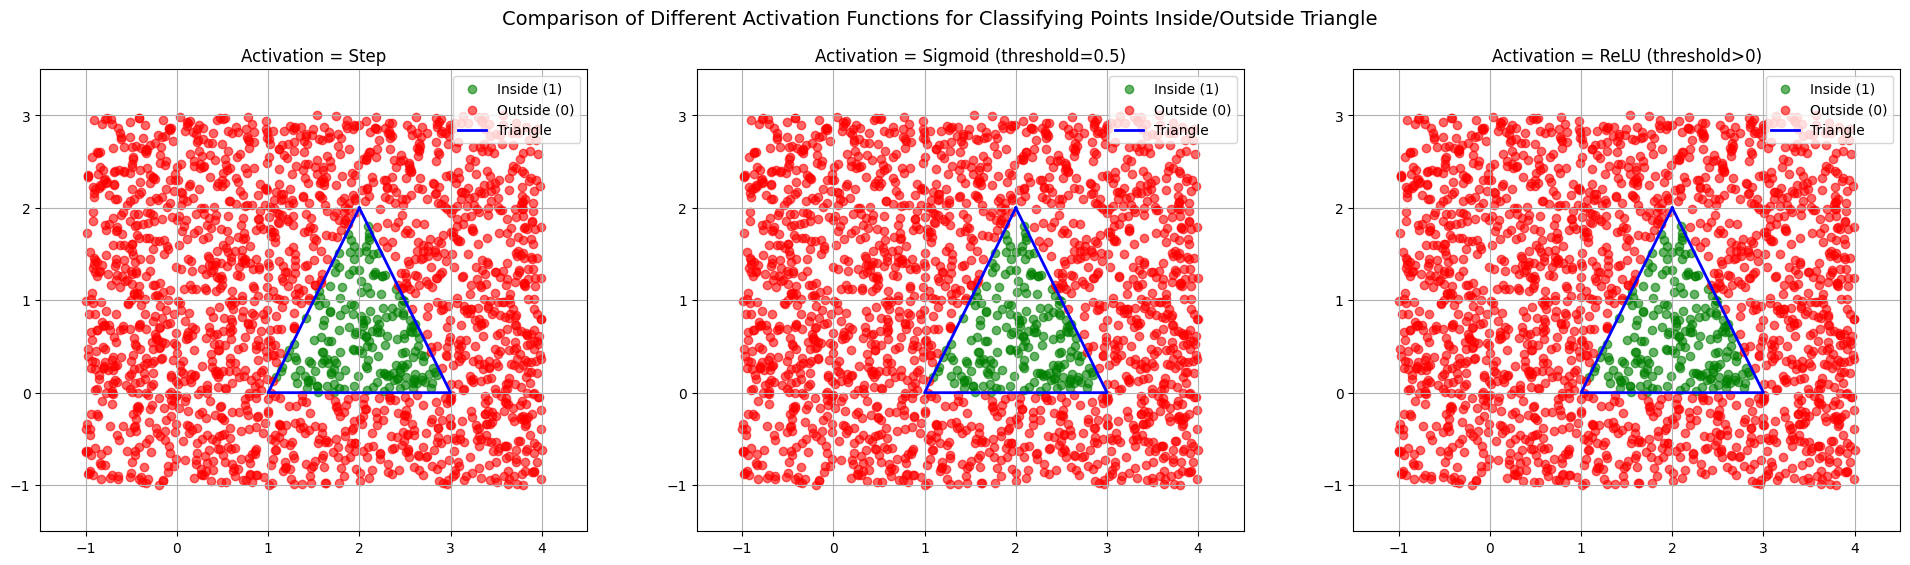

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import math
-----------------------
def f_BC(x, y):
    return y

def f_AB(x, y):
    return 6 - 2*x - y

def f_AC(x, y):
    return 2*x - y - 2

# -------------------------------------------------------
# 2) توابع فعّال‌ساز (Step, Sigmoid, ReLU)
# -------------------------------------------------------
def step_func(s):
    """ تابع پله مک‌کالاک–پیتس """
    return 1 if s >= 0 else 0

def sigmoid_func(s):
    """ تابع سیگموید در بازه‌ی (0,1) """
    return 1 / (1 + math.exp(-s))

def relu_func(s):
    """ تابع ReLU: max(0, s) """
    return max(0, s)

# -------------------------------------------------------
# 3) نورون‌های پایه برای هر ضلع (بر اساس تابع پله)
#    (در صورت نیاز برای سیگموید یا ReLU هم مشابه تعریف می‌کنیم)
# -------------------------------------------------------
def neuron_BC_step(x, y):
    return step_func(f_BC(x, y))

def neuron_AB_step(x, y):
    return step_func(f_AB(x, y))

def neuron_AC_step(x, y):
    return step_func(f_AC(x, y))

# -------------------------------------------------------
# 4) نورون نهایی در حالت پله (AND سه خروجی)
# -------------------------------------------------------
def final_neuron_step(x, y):
    """ خروجی نهایی با تابع پله (Step) و AND سه خط """
    z_bc = neuron_BC_step(x, y)
    z_ab = neuron_AB_step(x, y)
    z_ac = neuron_AC_step(x, y)

    # روش ۱: AND منطقی
    # return 1 if (z_bc == 1 and z_ab == 1 and z_ac == 1) else 0

    # روش ۲: جمع و آستانه
    s = z_bc + z_ab + z_ac - 2.5
    return step_func(s)

# -------------------------------------------------------
# 5) نورون نهایی در حالت سیگموید
#    (خروجی هر خط = سیگموید مقدار خطی، سپس با آستانه ۰.۵ قطع می‌کنیم)
# -------------------------------------------------------
def final_neuron_sigmoid(x, y):
    z_bc = sigmoid_func(f_BC(x, y))
    z_ab = sigmoid_func(f_AB(x, y))
    z_ac = sigmoid_func(f_AC(x, y))

    # ابتدا هر خروجی را با 0.5 مقایسه و باینری می‌کنیم
    out_bc = 1 if z_bc >= 0.5 else 0
    out_ab = 1 if z_ab >= 0.5 else 0
    out_ac = 1 if z_ac >= 0.5 else 0

    # سپس AND سه مقدار
    return 1 if (out_bc == 1 and out_ab == 1 and out_ac == 1) else 0

# -------------------------------------------------------
# 6) نورون نهایی در حالت ReLU
# -------------------------------------------------------
def final_neuron_relu(x, y):
    z_bc = relu_func(f_BC(x, y))
    z_ab = relu_func(f_AB(x, y))
    z_ac = relu_func(f_AC(x, y))

    # خروجی ReLU می‌تواند 0 یا مقدار مثبت باشد.
    # اگر خروجی هر خط > 0 باشد، یعنی در سمت صحیح خط قرار دارد.
    out_bc = 1 if z_bc > 0 else 0
    out_ab = 1 if z_ab > 0 else 0
    out_ac = 1 if z_ac > 0 else 0

    # AND نهایی
    return 1 if (out_bc == 1 and out_ab == 1 and out_ac == 1) else 0

# -------------------------------------------------------
# تابع کمکی برای اعمال یک «نورون نهایی» به همه‌ی نقاط
# و جداکردن آن‌ها بر اساس برچسب خروجی (داخل=1، بیرون=0)
# -------------------------------------------------------
def classify_points(neuron_func, xs, ys):
    x_in, y_in = [], []
    x_out, y_out = [], []
    for (x, y) in zip(xs, ys):
        z = neuron_func(x, y)
        if z == 1:
            x_in.append(x)
            y_in.append(y)
        else:
            x_out.append(x)
            y_out.append(y)
    return x_in, y_in, x_out, y_out

# -------------------------------------------------------
# 7) تولید داده‌ی تصادفی
# -------------------------------------------------------
np.random.seed(0)
N = 2000
x_min, x_max = -1, 4
y_min, y_max = -1, 3

xs = np.random.uniform(x_min, x_max, N)
ys = np.random.uniform(y_min, y_max, N)

# -------------------------------------------------------
# 8) اعمال سه نورون نهایی مختلف (Step, Sigmoid, ReLU)
# -------------------------------------------------------
x_in_step,  y_in_step,  x_out_step,  y_out_step  = classify_points(final_neuron_step,    xs, ys)
x_in_sigm,  y_in_sigm,  x_out_sigm,  y_out_sigm  = classify_points(final_neuron_sigmoid, xs, ys)
x_in_relu,  y_in_relu,  x_out_relu,  y_out_relu  = classify_points(final_neuron_relu,    xs, ys)

# -------------------------------------------------------
# 9) رسم نتایج در سه زیرشکل (Subplot) برای مقایسه
# -------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# -- نقاط مرجع مثلث --
A = (2, 2)
B = (3, 0)
C = (1, 0)
triangle_x = [A[0], B[0], C[0], A[0]]
triangle_y = [A[1], B[1], C[1], A[1]]

# === زیرشکل 1: Step ===
axes[0].scatter(x_in_step, y_in_step, color='green', alpha=0.6, label='Inside (1)')
axes[0].scatter(x_out_step, y_out_step, color='red', alpha=0.6, label='Outside (0)')
axes[0].plot(triangle_x, triangle_y, 'b-', linewidth=2, label='Triangle')
axes[0].set_title("Activation = Step")
axes[0].set_xlim([x_min - 0.5, x_max + 0.5])
axes[0].set_ylim([y_min - 0.5, y_max + 0.5])
axes[0].grid(True)
axes[0].legend()

# === زیرشکل 2: Sigmoid ===
axes[1].scatter(x_in_sigm, y_in_sigm, color='green', alpha=0.6, label='Inside (1)')
axes[1].scatter(x_out_sigm, y_out_sigm, color='red', alpha=0.6, label='Outside (0)')
axes[1].plot(triangle_x, triangle_y, 'b-', linewidth=2, label='Triangle')
axes[1].set_title("Activation = Sigmoid (threshold=0.5)")
axes[1].set_xlim([x_min - 0.5, x_max + 0.5])
axes[1].set_ylim([y_min - 0.5, y_max + 0.5])
axes[1].grid(True)
axes[1].legend()

# === زیرشکل 3: ReLU ===
axes[2].scatter(x_in_relu, y_in_relu, color='green', alpha=0.6, label='Inside (1)')
axes[2].scatter(x_out_relu, y_out_relu, color='red', alpha=0.6, label='Outside (0)')
axes[2].plot(triangle_x, triangle_y, 'b-', linewidth=2, label='Triangle')
axes[2].set_title("Activation = ReLU (threshold>0)")
axes[2].set_xlim([x_min - 0.5, x_max + 0.5])
axes[2].set_ylim([y_min - 0.5, y_max + 0.5])
axes[2].grid(True)
axes[2].legend()

plt.suptitle("Comparison of Different Activation Functions for Classifying Points Inside/Outside Triangle", fontsize=14)
plt.show()


Q2-PART1&2



In [30]:
!pip install --upgrade --no-cache-dir gdown
!gdown 15G2VWqJAJR45MW24z2iHLwUZlcUgdUC3

Downloading...
From: https://drive.google.com/uc?id=15G2VWqJAJR45MW24z2iHLwUZlcUgdUC3
To: /content/teleCust1000t.csv
100% 37.0k/37.0k [00:00<00:00, 37.5MB/s]


In [31]:
import pandas as pd
data_path = "/content/teleCust1000t.csv"


df = pd.read_csv(data_path)


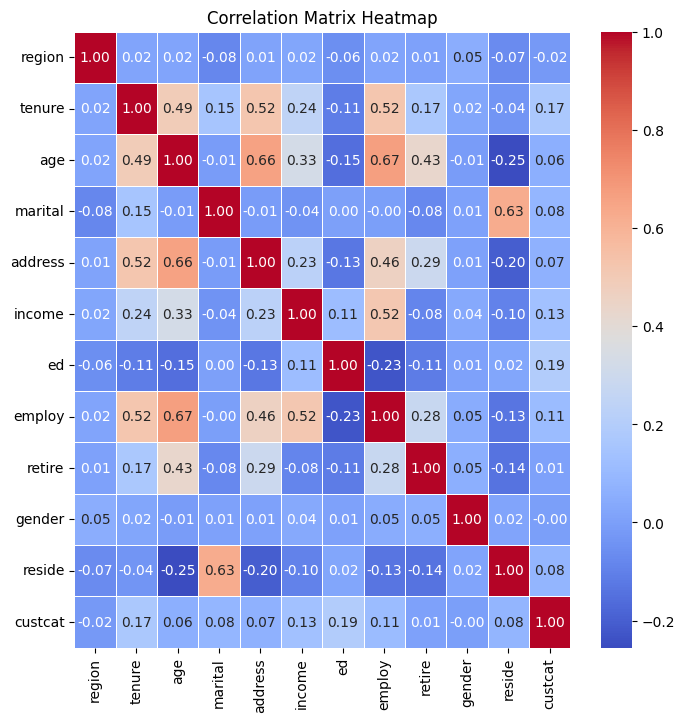

بیشترین همبستگی با custcat:
 ed        0.193864
tenure    0.166691
Name: custcat, dtype: float64


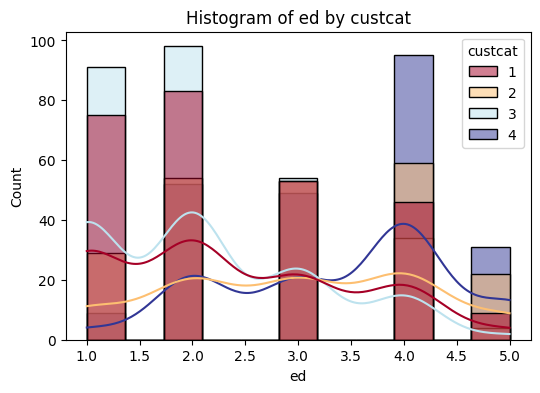

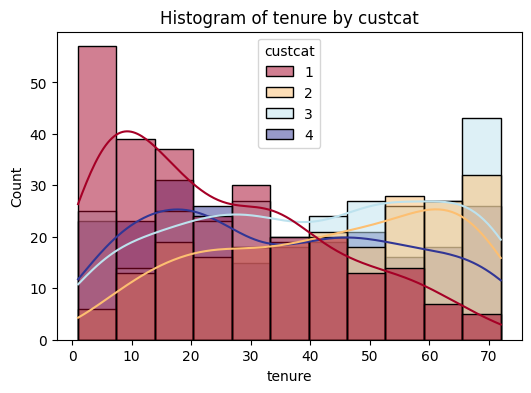

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

corr_with_target = corr_matrix['custcat'].drop('custcat')
top2_features = corr_with_target.abs().sort_values(ascending=False).head(2)

print("بیشترین همبستگی با custcat:\n", top2_features)

for feat in top2_features.index:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feat, kde=True, hue='custcat', palette='RdYlBu')
    plt.title(f'Histogram of {feat} by custcat')
    plt.show()

Q2-PART3

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. تعیین Seed برای اطمینان از تکرارپذیری
random_seed = 23
np.random.seed(random_seed)

# 2. مخلوط کردن تصادفی دیتافریم
df = df.sample(frac=1, random_state=random_seed).reset_index(drop=True)

# تعریف ستون هدف و ویژگی‌ها
target_col = 'custcat'  # ستون هدف
X = df.drop(columns=[target_col])  # حذف ستون هدف از ویژگی‌ها
y = df[target_col]  # متغیر هدف

# 3. نرمال‌سازی ویژگی‌ها با MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4. تقسیم داده به مجموعه‌های آموزشی، موقت (Temp) و آزمایشی (Test)
# مرحله اول: 70% داده برای آموزش، 30% به عنوان مجموعه موقت
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=random_seed, stratify=y
)

# مرحله دوم: تقسیم مجموعه موقت به Validation و Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.33,  # تقریباً 10% از کل داده برای Test
    random_state=random_seed, stratify=y_temp
)

# چاپ ابعاد مجموعه‌های آموزشی، اعتبارسنجی و آزمایشی
print("Shapes of splits:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape}, y_test:  {y_test.shape}")


Shapes of splits:
X_train: (700, 11), y_train: (700,)
X_val:   (201, 11), y_val:   (201,)
X_test:  (99, 11), y_test:  (99,)


Q2-PART4-



In [34]:
import numpy as np

# فرض بر این است که y شما مقادیری در {1, 2, 3, 4} دارد
y = y - 1  # حالا مقادیر در {0, 1, 2, 3} خواهند بود

# اگر قبلا X, y را به چند بخش train/val/test تقسیم کرده‌اید، همان کار را روی هر یک انجام دهید
y_train = y_train - 1
y_val   = y_val - 1
y_test  = y_test - 1

# حال می‌توانید به راحتی از to_categorical استفاده کنید
from tensorflow.keras.utils import to_categorical

num_classes = 4  # چون حالا کلاس‌ها 0 تا 3 هستند
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat   = to_categorical(y_val,   num_classes=num_classes)
y_test_cat  = to_categorical(y_test,  num_classes=num_classes)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model_1 = Sequential()
model_1.add(Dense(16, input_dim=X_train.shape[1], activation='elu'))  # یک لایه‌ی مخفی
model_1.add(Dense(num_classes, activation='softmax'))                  # لایه‌ی خروجی

optimizer = SGD(learning_rate=0.01, momentum=0.0)  # می‌توانید مقدار momentum و غیره را تغییر دهید
model_1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train_cat,
                        validation_data=(X_val, y_val_cat),
                        epochs=200,  # تعداد تکرار آموزشی
                        batch_size=32,
                        verbose=0)

# ارزیابی روی تست
test_loss_1, test_acc_1 = model_1.evaluate(X_test, y_test_cat, verbose=0)
print(f"Model 1 - Test Loss: {test_loss_1:.4f}, Test Accuracy: {test_acc_1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model 1 - Test Loss: 1.1937, Test Accuracy: 0.4444


In [36]:
model_2 = Sequential()
model_2.add(Dense(16, input_dim=X_train.shape[1], activation='elu'))
model_2.add(Dense(8, activation='elu'))  # لایه‌ی مخفی دوم
model_2.add(Dense(num_classes, activation='softmax'))

optimizer = SGD(learning_rate=0.01, momentum=0.0)
model_2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train_cat,
                        validation_data=(X_val, y_val_cat),
                        epochs=200,
                        batch_size=32,
                        verbose=0)

# ارزیابی روی تست
test_loss_2, test_acc_2 = model_2.evaluate(X_test, y_test_cat, verbose=0)
print(f"Model 2 - Test Loss: {test_loss_2:.4f}, Test Accuracy: {test_acc_2:.4f}")


Model 2 - Test Loss: 1.1931, Test Accuracy: 0.3939


Q2-PART4-

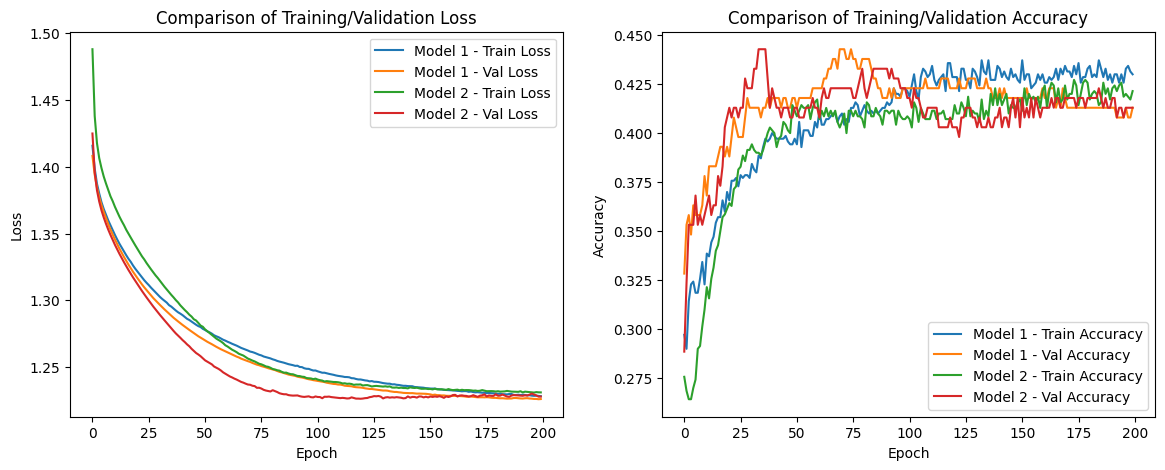

---- Final Results ----
Model 1 (1 hidden layer) - Test Accuracy: 0.4444
Model 2 (2 hidden layers) - Test Accuracy: 0.3939


In [37]:
import matplotlib.pyplot as plt

# فرض بر این است که پس از مدل‌سازی و آموزش،
# دو آبجکت history_1 و history_2 در اختیار دارید:

# history_1 = model_1.fit(...)
# history_2 = model_2.fit(...)

# مقایسه روند Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Model 1 - Train Loss')
plt.plot(history_1.history['val_loss'], label='Model 1 - Val Loss')
plt.plot(history_2.history['loss'], label='Model 2 - Train Loss')
plt.plot(history_2.history['val_loss'], label='Model 2 - Val Loss')
plt.title('Comparison of Training/Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# مقایسه روند Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Model 1 - Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Model 1 - Val Accuracy')
plt.plot(history_2.history['accuracy'], label='Model 2 - Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Model 2 - Val Accuracy')
plt.title('Comparison of Training/Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

print("---- Final Results ----")
print(f"Model 1 (1 hidden layer) - Test Accuracy: {test_acc_1:.4f}")
print(f"Model 2 (2 hidden layers) - Test Accuracy: {test_acc_2:.4f}")


تاثیر تعدلد نورون

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# ----------------
# Model 1A: یک لایه مخفی با 16 نورون
# ----------------
model_1A = Sequential()
model_1A.add(Dense(16, input_dim=X_train.shape[1], activation='elu'))
model_1A.add(Dense(num_classes, activation='softmax'))

model_1A.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

history_1A = model_1A.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=200,
    batch_size=32,
    verbose=0  # برای عدم نمایش لاگ هر epoch
)

# ارزیابی نهایی روی Validation
val_loss_1A, val_acc_1A = model_1A.evaluate(X_val, y_val_cat, verbose=0)
print(f"[Model 1A] Validation Loss: {val_loss_1A:.4f}, Validation Accuracy: {val_acc_1A:.4f}")


# ----------------
# Model 1B: یک لایه مخفی با 32 نورون
# ----------------
model_1B = Sequential()
model_1B.add(Dense(32, input_dim=X_train.shape[1], activation='elu'))
model_1B.add(Dense(num_classes, activation='softmax'))

model_1B.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

history_1B = model_1B.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=200,
    batch_size=32,
    verbose=0
)

# ارزیابی نهایی روی Validation
val_loss_1B, val_acc_1B = model_1B.evaluate(X_val, y_val_cat, verbose=0)
print(f"[Model 1B] Validation Loss: {val_loss_1B:.4f}, Validation Accuracy: {val_acc_1B:.4f}")


[Model 1A] Validation Loss: 1.2441, Validation Accuracy: 0.4080
[Model 1B] Validation Loss: 1.2348, Validation Accuracy: 0.4279


In [39]:
# ----------------
# Model 2A: دو لایه مخفی با (15,10) نورون
# ----------------
model_2A = Sequential()
model_2A.add(Dense(15, input_dim=X_train.shape[1], activation='elu'))
model_2A.add(Dense(10, activation='elu'))
model_2A.add(Dense(num_classes, activation='softmax'))

model_2A.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

history_2A = model_2A.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=90,
    batch_size=32,
    verbose=0
)

val_loss_2A, val_acc_2A = model_2A.evaluate(X_val, y_val_cat, verbose=0)
print(f"[Model 2A] Validation Loss: {val_loss_2A:.4f}, Validation Accuracy: {val_acc_2A:.4f}")


# ----------------
# Model 2B: دو لایه مخفی با (30, 20) نورون
# ----------------
model_2B = Sequential()
model_2B.add(Dense(30, input_dim=X_train.shape[1], activation='elu'))
model_2B.add(Dense(20, activation='elu'))
model_2B.add(Dense(num_classes, activation='softmax'))

model_2B.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

history_2B = model_2B.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=90,
    batch_size=32,
    verbose=0
)

val_loss_2B, val_acc_2B = model_2B.evaluate(X_val, y_val_cat, verbose=0)
print(f"[Model 2B] Validation Loss: {val_loss_2B:.4f}, Validation Accuracy: {val_acc_2B:.4f}")


[Model 2A] Validation Loss: 1.2642, Validation Accuracy: 0.4129
[Model 2B] Validation Loss: 1.2561, Validation Accuracy: 0.4129


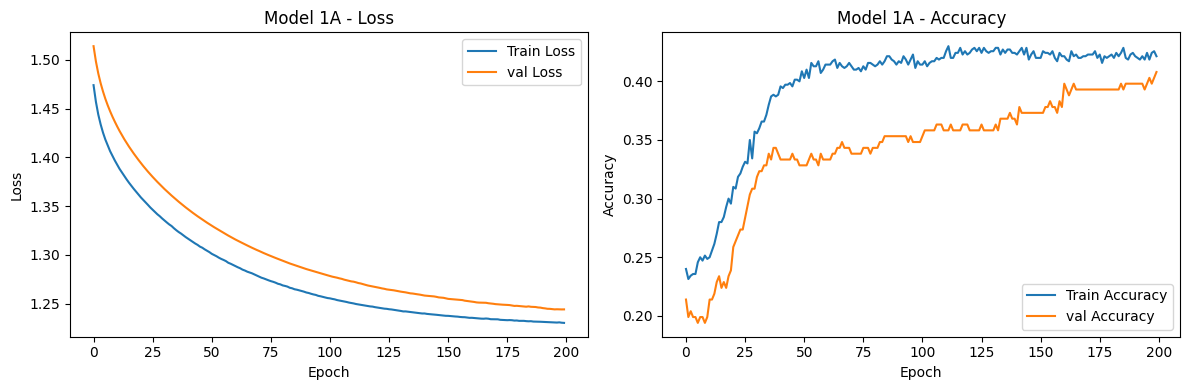

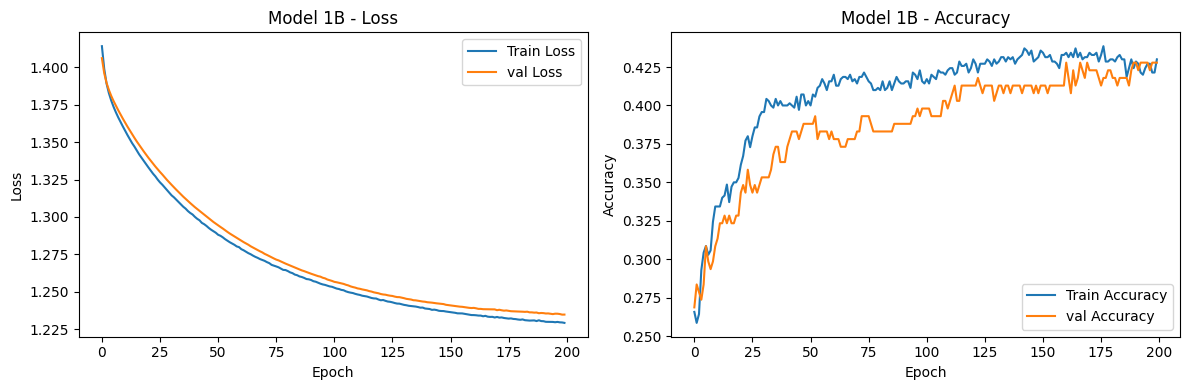

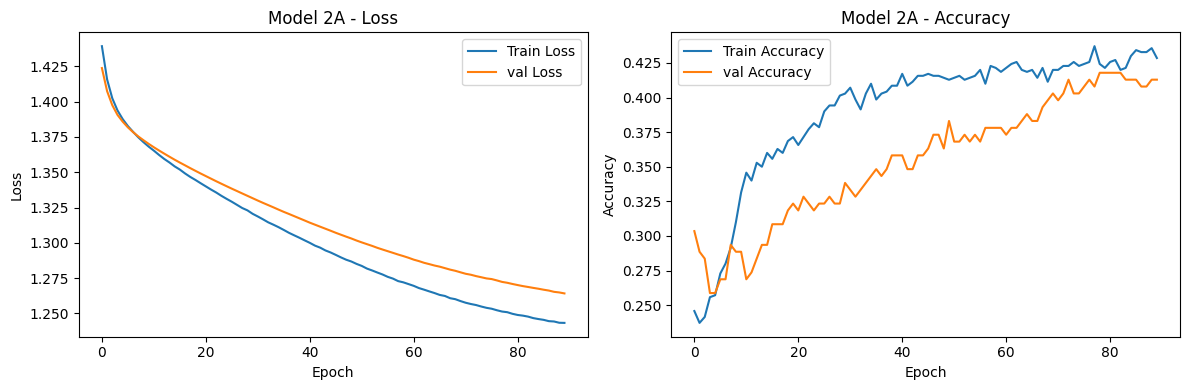

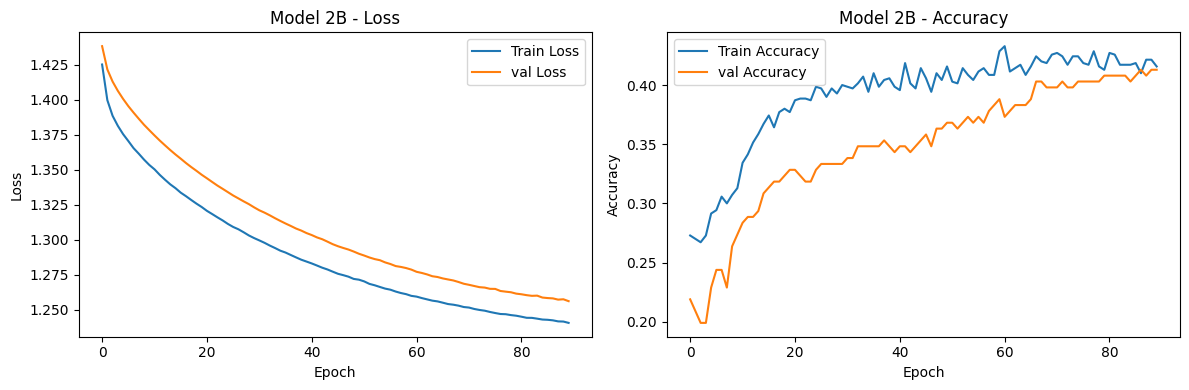

In [40]:
import matplotlib.pyplot as plt

# فرض بر این است که مدل‌های ما با این نام‌ها تعریف و fit شده‌اند:
# history_1A, history_1B, history_2A, history_2B

# یک دیکشنری برای دسترسی راحت
models = {
    '1A': history_1A,
    '1B': history_1B,
    '2A': history_2A,
    '2B': history_2B
}

for model_name, hist in models.items():
    plt.figure(figsize=(12, 4))

    # -----subplot 1: رسم Train Loss و Test Loss-----
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='val Loss')
    plt.title(f"Model {model_name} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # -----subplot 2: رسم Train Accuracy و Test Accuracy-----
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='val Accuracy')
    plt.title(f"Model {model_name} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


نرمالساز

مدل تک‌لایه + Batch Normalization

In [41]:
from tensorflow.keras.layers import Dense, BatchNormalization

# مدل تک‌لایه با یک لایه BatchNormalization
model_1_BN = Sequential()
model_1_BN.add(Dense(32, input_dim=X_train.shape[1], activation='elu'))
model_1_BN.add(BatchNormalization())    # ← لایه نرمال‌سازی دسته‌ای
model_1_BN.add(Dense(num_classes, activation='softmax'))

model_1_BN.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

history_1_BN = model_1_BN.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,                # طبق تصمیم شما
    batch_size=32,
    verbose=0
)

val_loss_1BN, val_acc_1BN = model_1_BN.evaluate(X_val, y_val_cat, verbose=0)
print(f"[Model_1_BN] Validation Loss: {val_loss_1BN:.4f}, Validation Accuracy: {val_acc_1BN:.4f}")


[Model_1_BN] Validation Loss: 1.2293, Validation Accuracy: 0.3930


مدل دو لایه به همراه BATCH NORMALIZATION


In [42]:
model_2_BN = Sequential()
model_2_BN.add(Dense(20, input_dim=X_train.shape[1], activation='elu'))
model_2_BN.add(BatchNormalization())    # ← لایه نرمال‌سازی پس از لایه اول

model_2_BN.add(Dense(30, activation='elu'))
model_2_BN.add(BatchNormalization())    # ← لایه نرمال‌سازی پس از لایه دوم

model_2_BN.add(Dense(num_classes, activation='softmax'))

model_2_BN.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

history_2_BN = model_2_BN.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=85,
    batch_size=32,
    verbose=0
)

val_loss_2BN, val_acc_2BN = model_2_BN.evaluate(X_val, y_val_cat, verbose=0)
print(f"[Model_2_BN] Validation Loss: {val_loss_2BN:.4f}, Validation Accuracy: {val_acc_2BN:.4f}")


[Model_2_BN] Validation Loss: 1.2176, Validation Accuracy: 0.4378


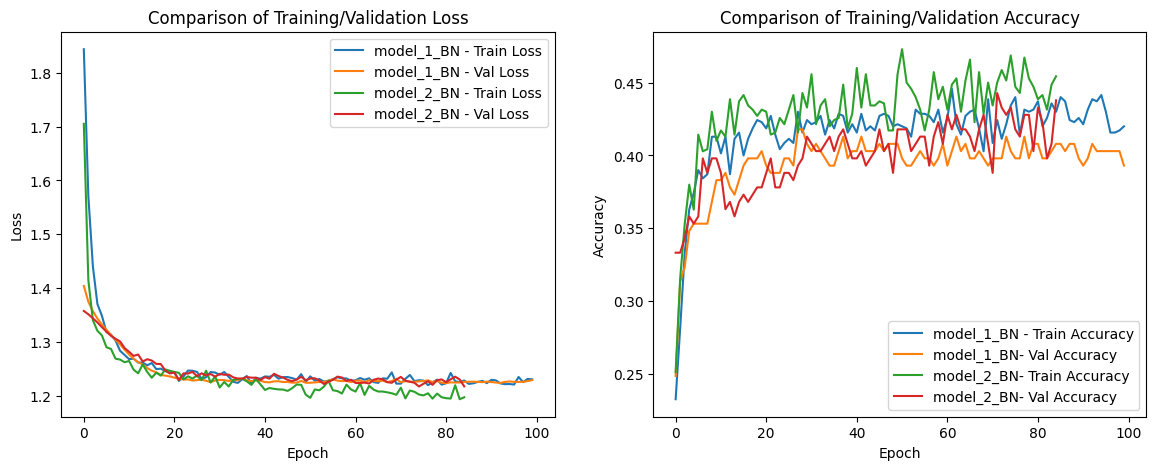

In [43]:
import matplotlib.pyplot as plt

# فرض بر این است که پس از مدل‌سازی و آموزش،
# دو آبجکت history_1 و history_2 در اختیار دارید:

# history_1 = model_1.fit(...)
# history_2 = model_2.fit(...)

# مقایسه روند Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_1_BN.history['loss'], label='model_1_BN - Train Loss')
plt.plot(history_1_BN.history['val_loss'], label='model_1_BN - Val Loss')
plt.plot(history_2_BN.history['loss'], label='model_2_BN - Train Loss')
plt.plot(history_2_BN.history['val_loss'], label='model_2_BN - Val Loss')
plt.title('Comparison of Training/Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# مقایسه روند Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_1_BN.history['accuracy'], label='model_1_BN - Train Accuracy')
plt.plot(history_1_BN.history['val_accuracy'], label='model_1_BN- Val Accuracy')
plt.plot(history_2_BN.history['accuracy'], label='model_2_BN- Train Accuracy')
plt.plot(history_2_BN.history['val_accuracy'], label='model_2_BN- Val Accuracy')
plt.title('Comparison of Training/Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




Q2-PART4-تاثیر DROPOUT

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model_best_noDO = Sequential()
model_best_noDO.add(Dense(30, input_dim=X_train.shape[1], activation='elu'))
model_best_noDO.add(Dense(15, activation='elu'))
model_best_noDO.add(Dense(num_classes, activation='softmax'))

model_best_noDO.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),  # یا هر بهینه‌ساز/لرنینگ‌ریت انتخابی
    metrics=['accuracy']
)

history_noDO = model_best_noDO.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=90,  # یا هر تعداد اپوخی که قبلاً استفاده می‌کردید
    batch_size=32,
    verbose=0
)

val_loss_noDO, val_acc_noDO = model_best_noDO.evaluate(X_val, y_val_cat, verbose=0)
print(f"[No Dropout] Validation Loss: {val_loss_noDO:.4f}, Validation Accuracy: {val_acc_noDO:.4f}")


[No Dropout] Validation Loss: 1.2208, Validation Accuracy: 0.4179


In [45]:
from tensorflow.keras.layers import Dense, Dropout

model_best_DO = Sequential()
model_best_DO.add(Dense(30, input_dim=X_train.shape[1], activation='elu'))
model_best_DO.add(Dropout(0.2))  # ← افزودن دراپ‌آوت پس از لایه‌ی اول

model_best_DO.add(Dense(15, activation='elu'))
model_best_DO.add(Dropout(0.2))  # ← افزودن دراپ‌آوت پس از لایه‌ی دوم

model_best_DO.add(Dense(num_classes, activation='softmax'))

model_best_DO.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

history_DO = model_best_DO.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=90,
    batch_size=32,
    verbose=0
)

val_loss_DO, val_acc_DO = model_best_DO.evaluate(X_val, y_val_cat, verbose=0)
print(f"[With Dropout] Validation Loss: {val_loss_DO:.4f}, Validation Accuracy: {val_acc_DO:.4f}")


[With Dropout] Validation Loss: 1.2676, Validation Accuracy: 0.3930



----- Comparison of Dropout vs. No-Dropout -----
No-Dropout:   Val Loss=1.2208, Val Acc=0.4179
Dropout:      Val Loss=1.2676, Val Acc=0.3930


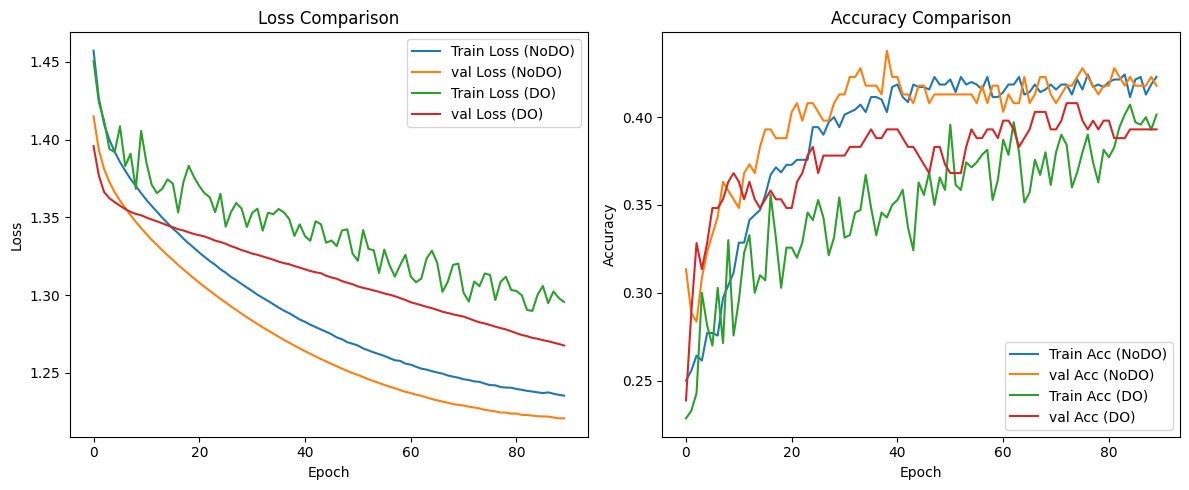

In [46]:
print("\n----- Comparison of Dropout vs. No-Dropout -----")
print(f"No-Dropout:   Val Loss={val_loss_noDO:.4f}, Val Acc={val_acc_noDO:.4f}")
print(f"Dropout:      Val Loss={val_loss_DO:.4f}, Val Acc={val_acc_DO:.4f}")
import matplotlib.pyplot as plt

# مدل بدون Dropout
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_noDO.history['loss'], label='Train Loss (NoDO)')
plt.plot(history_noDO.history['val_loss'], label='val Loss (NoDO)')
plt.plot(history_DO.history['loss'], label='Train Loss (DO)')
plt.plot(history_DO.history['val_loss'], label='val Loss (DO)')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_noDO.history['accuracy'], label='Train Acc (NoDO)')
plt.plot(history_noDO.history['val_accuracy'], label='val Acc (NoDO)')
plt.plot(history_DO.history['accuracy'], label='Train Acc (DO)')
plt.plot(history_DO.history['val_accuracy'], label='val Acc (DO)')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

# مدل دولایه با Dropout + L2-Regularization
model_best_L2 = model_best_DO

# لایهٔ اول: 30 نورون، ELU + L2
model_best_L2.add(
    Dense(30, input_dim=X_train.shape[1],
          activation='elu',
          kernel_regularizer=l2(0.0001))
)
model_best_L2.add(Dropout(0.2))

# لایهٔ دوم: 15 نورون، ELU + L2
model_best_L2.add(
    Dense(15, activation='elu',
          kernel_regularizer=l2(0.0001))
)
model_best_L2.add(Dropout(0.2))

# لایهٔ خروجی
model_best_L2.add(Dense(num_classes, activation='softmax'))

# کامپایل مدل
model_best_L2.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

# آموزش مدل (تعداد epoch و batch_size همانند قبل)
history_L2 = model_best_L2.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=90,   # یا هر تعداد اپوک مورد نظرتان
    batch_size=32,
    verbose=0
)

# ارزیابی روی Validation
val_loss_L2, val_acc_L2 = model_best_L2.evaluate(X_val, y_val_cat, verbose=0)
print(f"[With L2-Regularization] Validation Loss: {val_loss_L2:.4f}, Validation Accuracy: {val_acc_L2:.4f}")


[With L2-Regularization] Validation Loss: 1.2940, Validation Accuracy: 0.4080


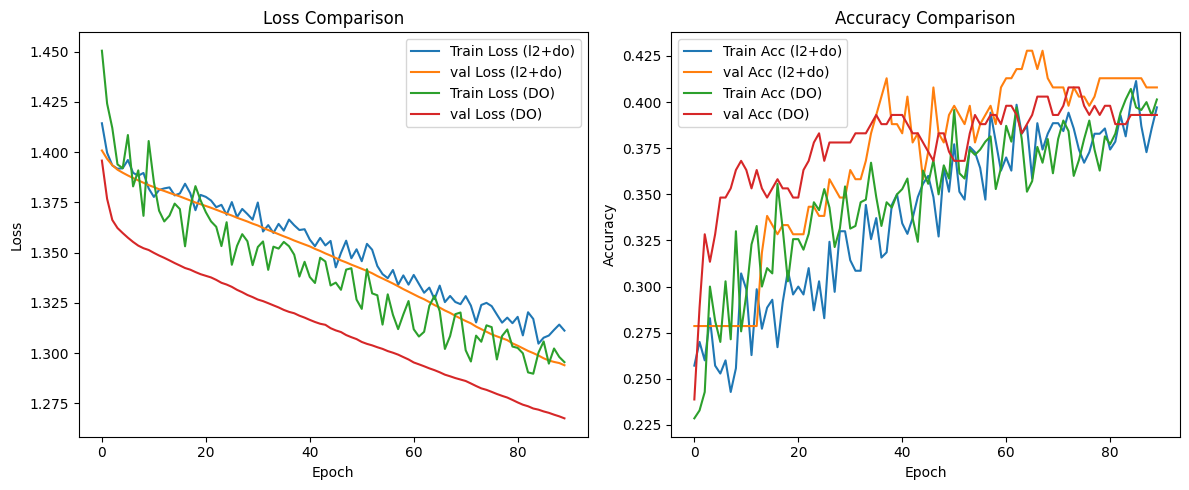

In [50]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_L2.history['loss'], label='Train Loss (l2+do)')
plt.plot(history_L2.history['val_loss'], label='val Loss (l2+do)')
plt.plot(history_DO.history['loss'], label='Train Loss (DO)')
plt.plot(history_DO.history['val_loss'], label='val Loss (DO)')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_L2.history['accuracy'], label='Train Acc (l2+do)')
plt.plot(history_L2.history['val_accuracy'], label='val Acc (l2+do)')
plt.plot(history_DO.history['accuracy'], label='Train Acc (DO)')
plt.plot(history_DO.history['val_accuracy'], label='val Acc (DO)')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [51]:
model_best_DO = Sequential()
model_best_DO.add(Dense(30, input_dim=X_train.shape[1], activation='elu'))
model_best_DO.add(Dropout(0.2))
model_best_DO.add(Dense(15, activation='elu'))
model_best_DO.add(Dropout(0.2))
model_best_DO.add(Dense(num_classes, activation='softmax'))


In [52]:
from tensorflow.keras.optimizers import Adam

model_Adam = Sequential()
model_Adam.add(Dense(30, input_dim=X_train.shape[1], activation='elu'))
model_Adam.add(Dropout(0.2))
model_Adam.add(Dense(15, activation='elu'))
model_Adam.add(Dropout(0.2))
model_Adam.add(Dense(num_classes, activation='softmax'))

model_Adam.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # LR پیش‌فرض Adam اغلب 0.001 است
    metrics=['accuracy']
)

history_Adam = model_Adam.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=90,  # یا هر تعداد که قبلاً تست کرده‌اید
    batch_size=32,
    verbose=0
)

val_loss_Adam, val_acc_Adam = model_Adam.evaluate(X_val, y_val_cat, verbose=0)
print(f"[Adam] Validation Loss: {val_loss_Adam:.4f}, Validation Accuracy: {val_acc_Adam:.4f}")



[Adam] Validation Loss: 1.2265, Validation Accuracy: 0.4080


In [53]:
# مدل قبلی با SGD (نمونه)
model_SGD = Sequential()
model_SGD.add(Dense(30, input_dim=X_train.shape[1], activation='elu'))
model_SGD.add(Dropout(0.2))
model_SGD.add(Dense(15, activation='elu'))
model_SGD.add(Dropout(0.2))
model_SGD.add(Dense(num_classes, activation='softmax'))

model_SGD.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

history_SGD = model_SGD.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=90,
    batch_size=32,
    verbose=0
)

val_loss_SGD, val_acc_SGD = model_SGD.evaluate(X_val, y_val_cat, verbose=0)
print(f"[SGD] Validation Loss: {val_loss_SGD:.4f}, Validation Accuracy: {val_acc_SGD:.4f}")


[SGD] Validation Loss: 1.2493, Validation Accuracy: 0.4129


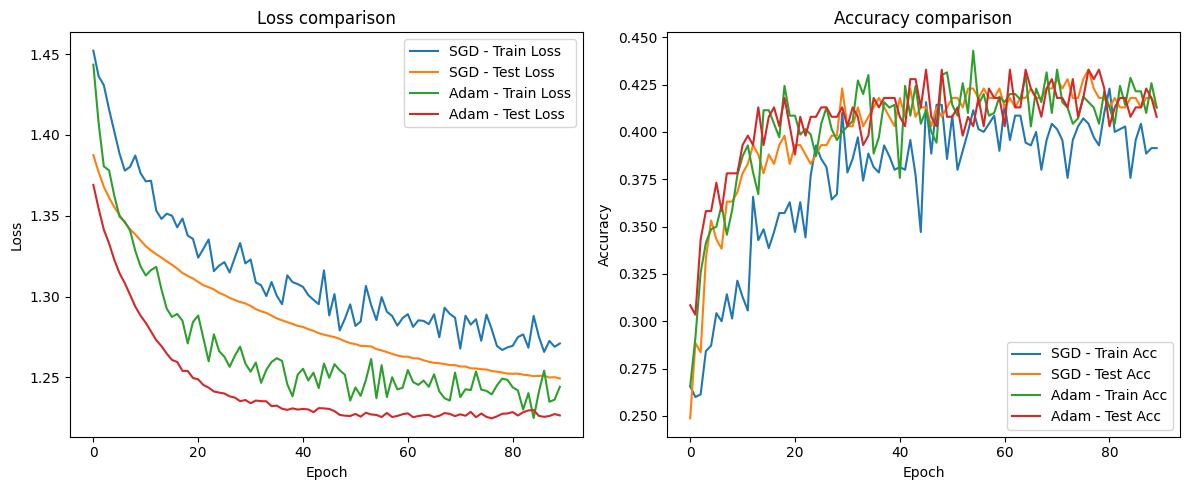

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_SGD.history['loss'], label='SGD - Train Loss')
plt.plot(history_SGD.history['val_loss'], label='SGD - Test Loss')
plt.plot(history_Adam.history['loss'], label='Adam - Train Loss')
plt.plot(history_Adam.history['val_loss'], label='Adam - Test Loss')
plt.title('Loss comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_SGD.history['accuracy'], label='SGD - Train Acc')
plt.plot(history_SGD.history['val_accuracy'], label='SGD - Test Acc')
plt.plot(history_Adam.history['accuracy'], label='Adam - Train Acc')
plt.plot(history_Adam.history['val_accuracy'], label='Adam - Test Acc')
plt.title('Accuracy comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Q2-PART5

In [55]:
# ارزیابی مدل آدم روی داده‌ی تست
test_loss_Adam, test_acc_Adam = model_Adam.evaluate(X_test, y_test_cat, verbose=0)
print(f"[Adam - Best Model] Test Loss: {test_loss_Adam:.4f}, Test Accuracy: {test_acc_Adam:.4f}")
test_loss_SGD, test_acc_SGD = model_SGD.evaluate(X_test, y_test_cat, verbose=0)
print(f"[SGD] Test Loss: {test_loss_SGD:.4f}, Test Accuracy: {test_acc_SGD:.4f}")


[Adam - Best Model] Test Loss: 1.1840, Test Accuracy: 0.4444
[SGD] Test Loss: 1.2202, Test Accuracy: 0.4242


Q2-PART5

In [57]:
import numpy as np

# اگر y_test_cat یک آرایه (samples, num_classes) باشد:
y_test_numeric = np.argmax(y_test_cat, axis=1)
num_samples_test = X_test.shape[0]
random_indices = np.random.choice(num_samples_test, size=10, replace=False)

X_random = X_test[random_indices]
y_random = y_test_numeric[random_indices]  # برچسب واقعی این 10 نمونه
pred_probs = model_Adam.predict(X_random)               # خروجی احتمالات (Softmax)
pred_labels = np.argmax(pred_probs, axis=1)             # برچسب پیش‌بینی‌شده
pred_probs_Adam = model_Adam.predict(X_random)  # خروجی احتمال (Softmax)
pred_labels_Adam = np.argmax(pred_probs_Adam, axis=1)  # کلاس پیش‌بینی‌شده (0..3)
pred_probs_SGD = model_SGD.predict(X_random)
pred_labels_SGD = np.argmax(pred_probs_SGD, axis=1)


print("\n===== 10 Samples from Test Set - Comparison =====")
for i, idx in enumerate(random_indices):
    true_label = y_random[i]
    adam_label = pred_labels_Adam[i]

    # اگر مدل‌های دیگر را هم گزارش می‌کنید:
    sgd_label  = pred_labels_SGD[i]


    print(f"Index={idx:4d} | True={true_label} | Adam={adam_label} | SGD={sgd_label} ")
print("\n===== 10 Random Samples - Best Model (Adam) =====")
for i, idx in enumerate(random_indices):
    print(f"Index={idx:4d} | True Label={y_random[i]} | Predicted={pred_labels_Adam[i]}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

===== 10 Samples from Test Set - Comparison =====
Index=  78 | True=0 | Adam=0 | SGD=0 
Index=  37 | True=3 | Adam=3 | SGD=3 
Index=  65 | True=2 | Adam=3 | SGD=0 
Index=  54 | True=2 | Adam=0 | SGD=0 
Index=  15 | True=2 | Adam=2 | SGD=2 
Index=  20 | True=3 | Adam=3 | SGD=3 
Index=  79 | True=3 | Adam=1 | SGD=2 
Index=  25 | True=0 | Adam=2 | SGD=2 
Index=  56 | True=2 | Adam=0 | SGD=0 
Index=  17 | True=2 | Adam=1 | SGD=3 

===== 10 Random Samples - Best Model (Adam) =====
Index=  78 | True Label=0 | Predicted=0
Index=  37 | True Label=3 | Predicted=3
Index=  65 | True Label=2 | Predicted=3
Index=  54 | True Label=2 | Predicted=0
Index=  15 | True Label=2 | Predicted=2
Index=  20 | True Label=3 | Predicted=3
Index=  79 | True Label=3 | Predicted=1
Index=  25 | True Label=0 | Predicted=2
Index=  56 | True Label=2 | Predicted=0
Index=  17 | True Label=2 | Predicted=1


Q2-PART6

In [58]:
import numpy as np
from sklearn.metrics import accuracy_score

probs_A = model_Adam.predict(X_test)
probs_B = model_2B.predict(X_test)

ensemble_probs = (probs_A + probs_B) / 2.0
ensemble_preds = np.argmax(ensemble_probs, axis=1)
acc_ensemble = accuracy_score(y_test, ensemble_preds)

preds_A = np.argmax(probs_A, axis=1)
preds_B = np.argmax(probs_B, axis=1)
acc_A = accuracy_score(y_test, preds_A)
acc_B = accuracy_score(y_test, preds_B)

print(f"Model A Test Accuracy: {acc_A:.4f}")
print(f"Model B Test Accuracy: {acc_B:.4f}")
print(f"Ensemble  Test Accuracy: {acc_ensemble:.4f}")

if acc_ensemble > max(acc_A, acc_B):
    print("Ensemble improved the result, likely due to complementary errors.")
elif abs(acc_ensemble - max(acc_A, acc_B)) < 1e-4:
    print("Ensemble performance is similar to the best single model.")
else:
    print("Ensemble did not help or got worse, possibly because one model is weaker or they have similar errors.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model A Test Accuracy: 0.4444
Model B Test Accuracy: 0.3838
Ensemble  Test Accuracy: 0.4141
Ensemble did not help or got worse, possibly because one model is weaker or they have similar errors.


Q3-PART1-MODIFIED VERSION OF CONVERT IMAGE TO BINARY

In [ ]:
import numpy as np
from PIL import Image

def convert_image_to_binary(path, threshold=127):
    """
    Convert an image to a binary representation.

    Args:
        path (str): The file path to the input image.
        threshold (int): Threshold for converting to binary (default: 127).

    Returns:
        list: A binary representation of the image where white is -1 and black is 1.
    """
    # Open the image and convert it to grayscale
    image = Image.open(path).convert("L")

    # Convert image to a NumPy array
    image_array = np.array(image)

    # Apply threshold to create binary image (-1 for white, 1 for black)
    binary_image = np.where(image_array > threshold, -1, 1)

    # Flatten the binary image to a list and return
    return binary_image.flatten().tolist()


Q3-PART1-MODIFIED VERSION OF MAKING NOISE

In [ ]:
import numpy as np
from PIL import Image

def get_noisy_image(input_path, output_path, noise_factor=50):
    """
    Add noise to an image and save it.

    Args:
        input_path (str): Path to the input image.
        output_path (str): Path to save the noisy image.
        noise_factor (int): Intensity of noise to add (default: 50).
    """
    # Open the input image and convert to numpy array
    image = Image.open(input_path).convert("RGB")
    image_array = np.array(image, dtype=np.int16)

    # Add random noise
    noise = np.random.randint(-noise_factor, noise_factor + 1, image_array.shape)
    noisy_image = np.clip(image_array + noise, 0, 255).astype(np.uint8)

    # Save the noisy image
    Image.fromarray(noisy_image).save(output_path, "JPEG")


In [ ]:
!gdown 1DapNZfUiyfnDrzxm8W16vrqYlVr0dKlP
!gdown 1n4h881RzmP7PC8RNdwozXBXBeWtpg6DP
!gdown 1g2_dCz6FrSAi0fi6AXLob_Jondhrs7rI
!gdown 1Js3pKuXts2wy-7s3jV-uhrwoz6qI64pB
!gdown 1bdcj6Rl7pY9G8DJI8pfiQcaM07UU_2jz





Downloading...
From: https://drive.google.com/uc?id=1DapNZfUiyfnDrzxm8W16vrqYlVr0dKlP
To: /content/1.jpg
100% 1.49k/1.49k [00:00<00:00, 4.85MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n4h881RzmP7PC8RNdwozXBXBeWtpg6DP
To: /content/2.jpg
100% 1.65k/1.65k [00:00<00:00, 3.94MB/s]
Downloading...
From: https://drive.google.com/uc?id=1g2_dCz6FrSAi0fi6AXLob_Jondhrs7rI
To: /content/3.jpg
100% 1.90k/1.90k [00:00<00:00, 6.36MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Js3pKuXts2wy-7s3jV-uhrwoz6qI64pB
To: /content/4.jpg
100% 1.50k/1.50k [00:00<00:00, 4.22MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bdcj6Rl7pY9G8DJI8pfiQcaM07UU_2jz
To: /content/5.jpg
100% 1.47k/1.47k [00:00<00:00, 3.65MB/s]


Q3-PART2


Analyzing image: /content/1.jpg


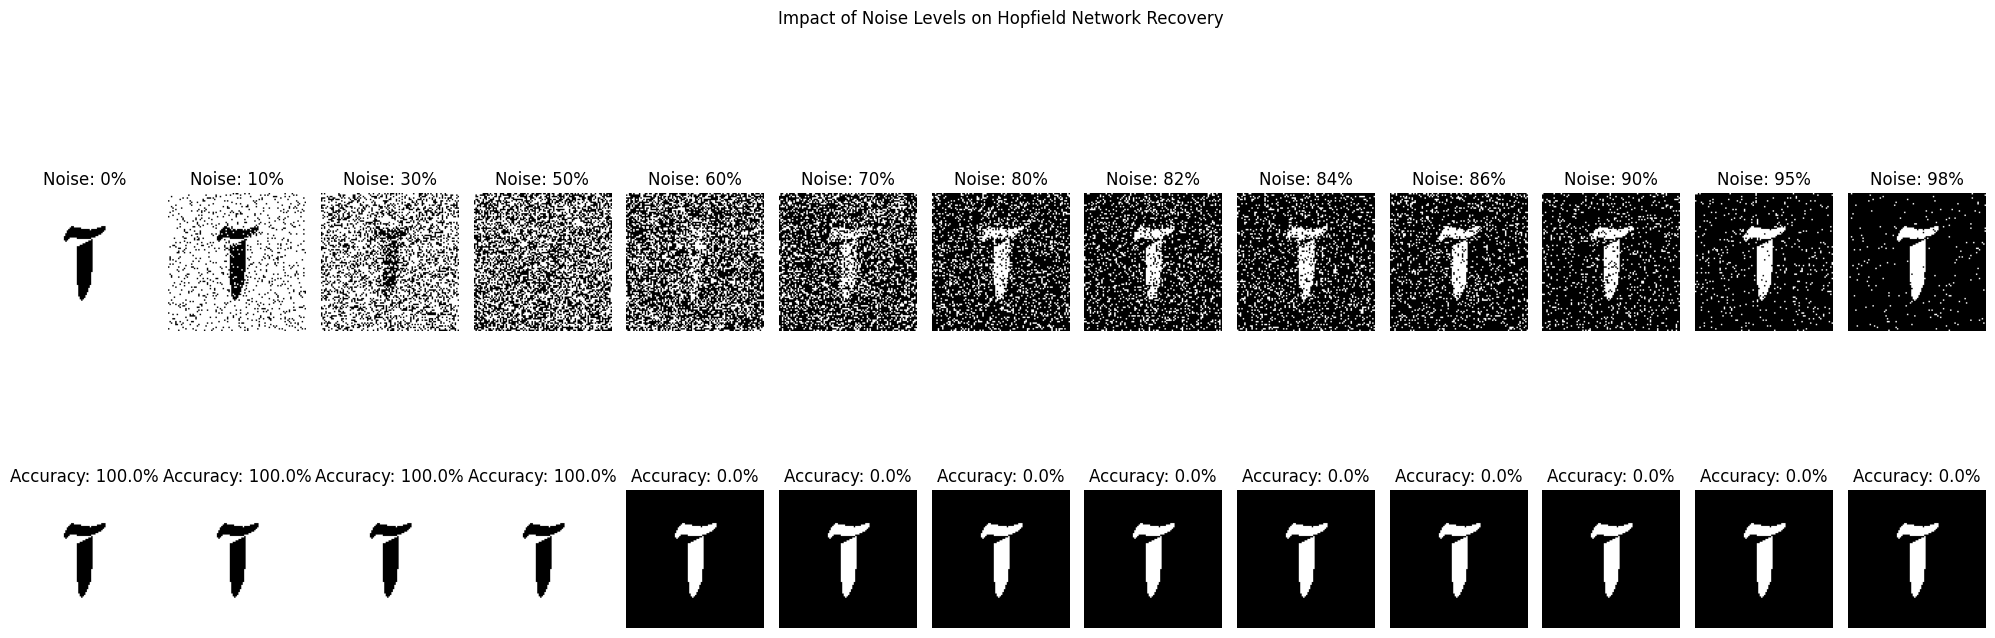

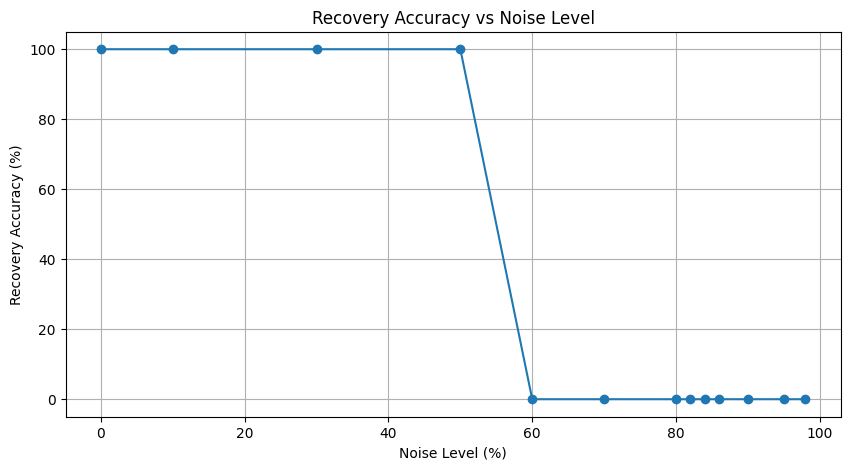


Analyzing image: /content/2.jpg


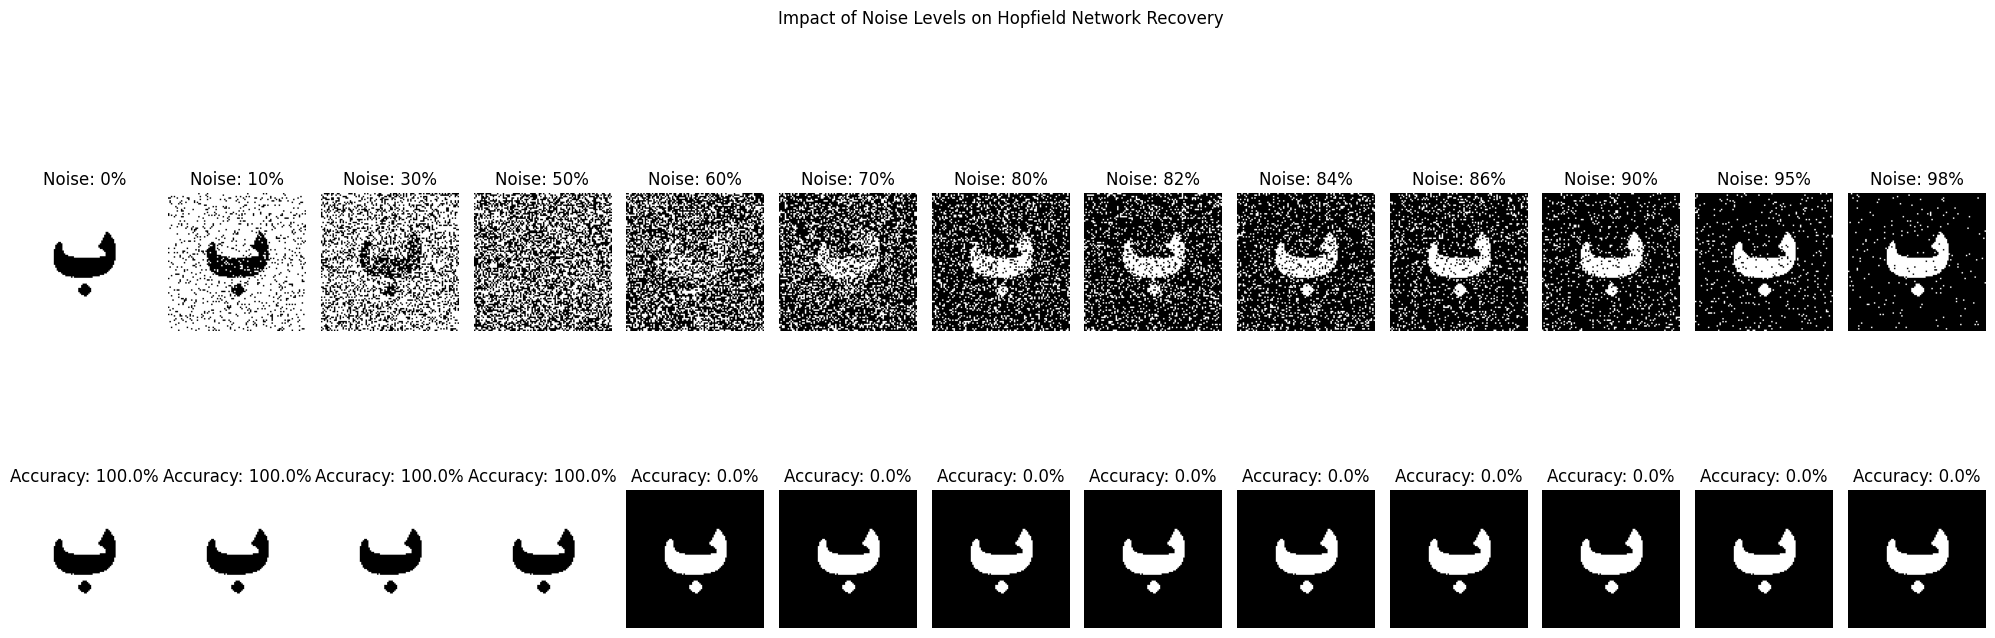

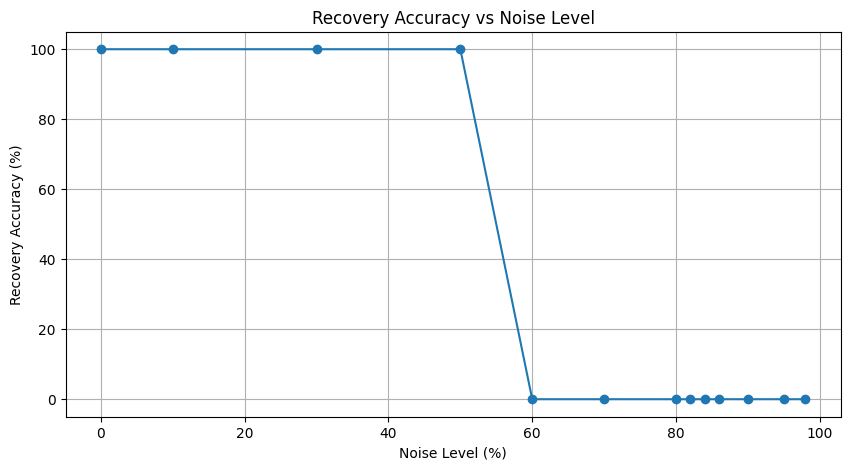


Analyzing image: /content/3.jpg


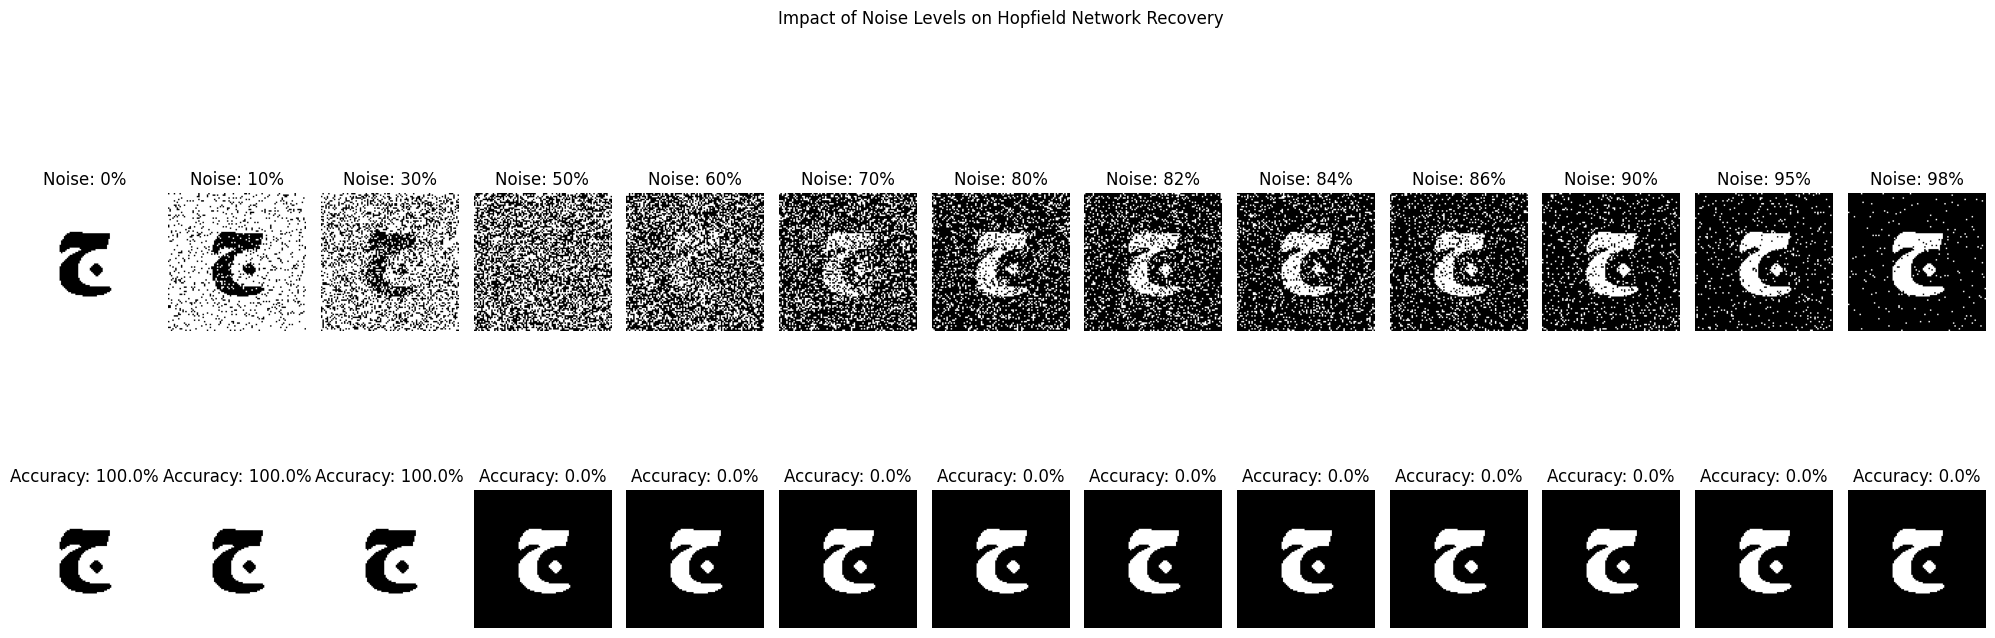

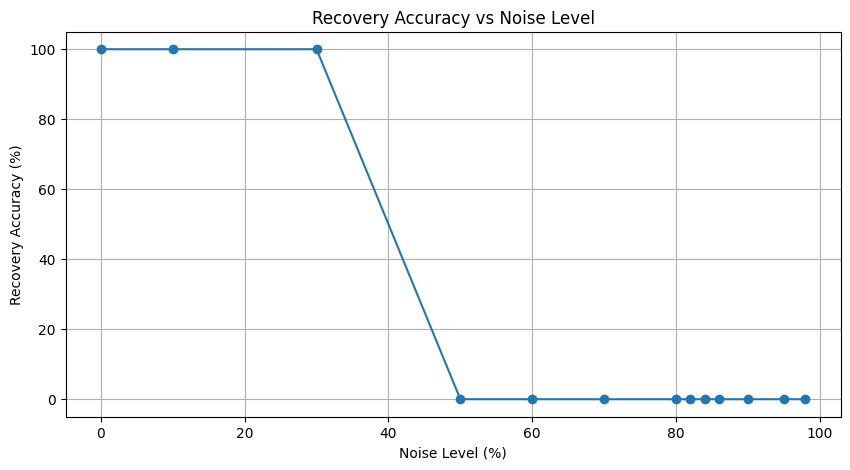


Analyzing image: /content/4.jpg


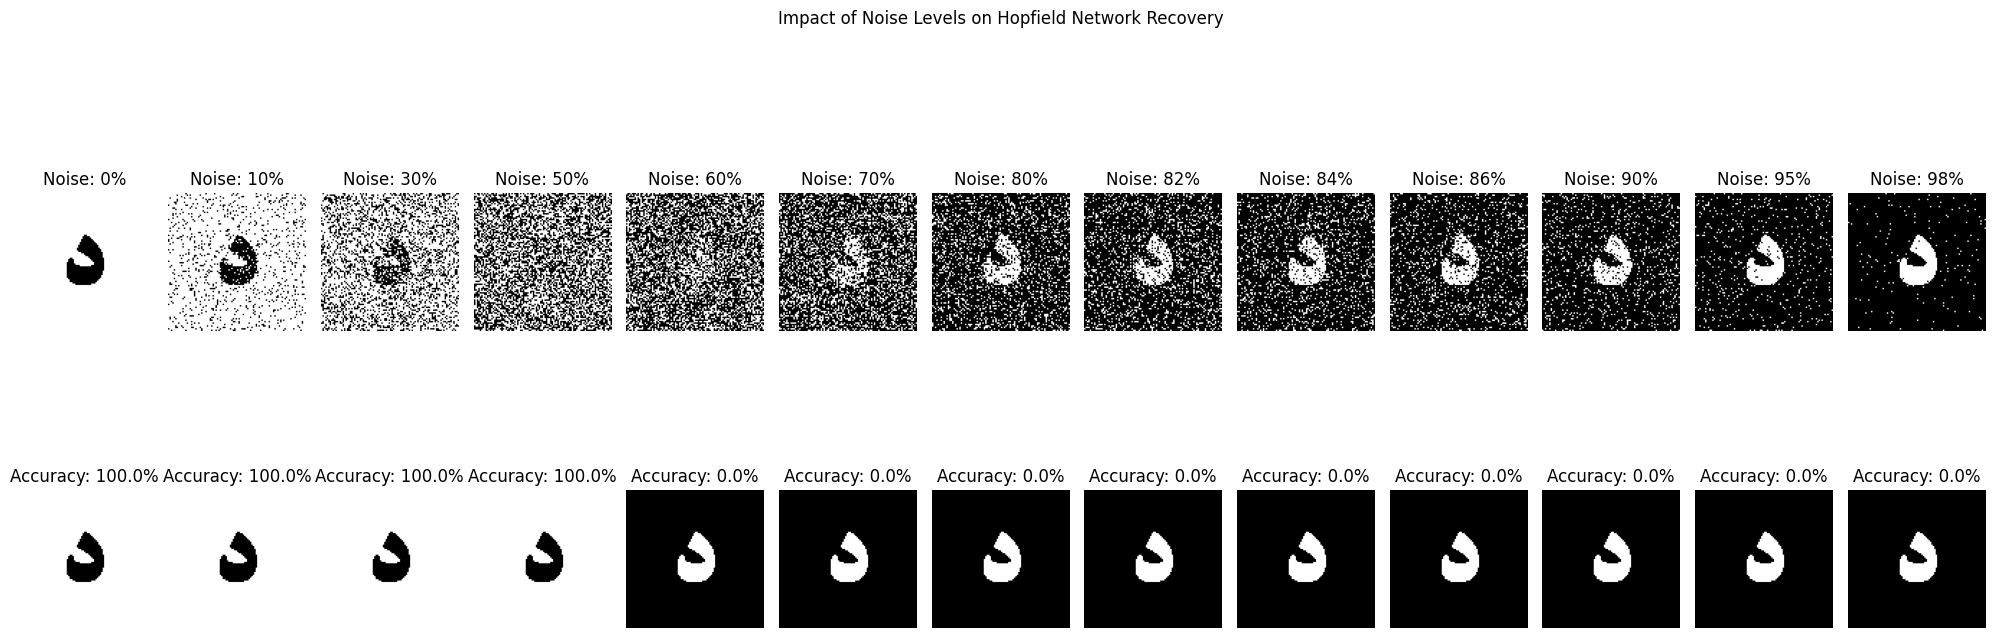

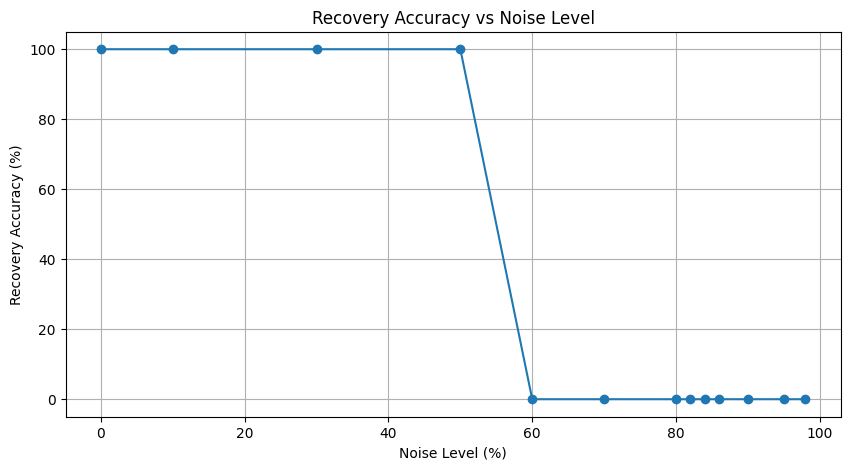


Analyzing image: /content/5.jpg


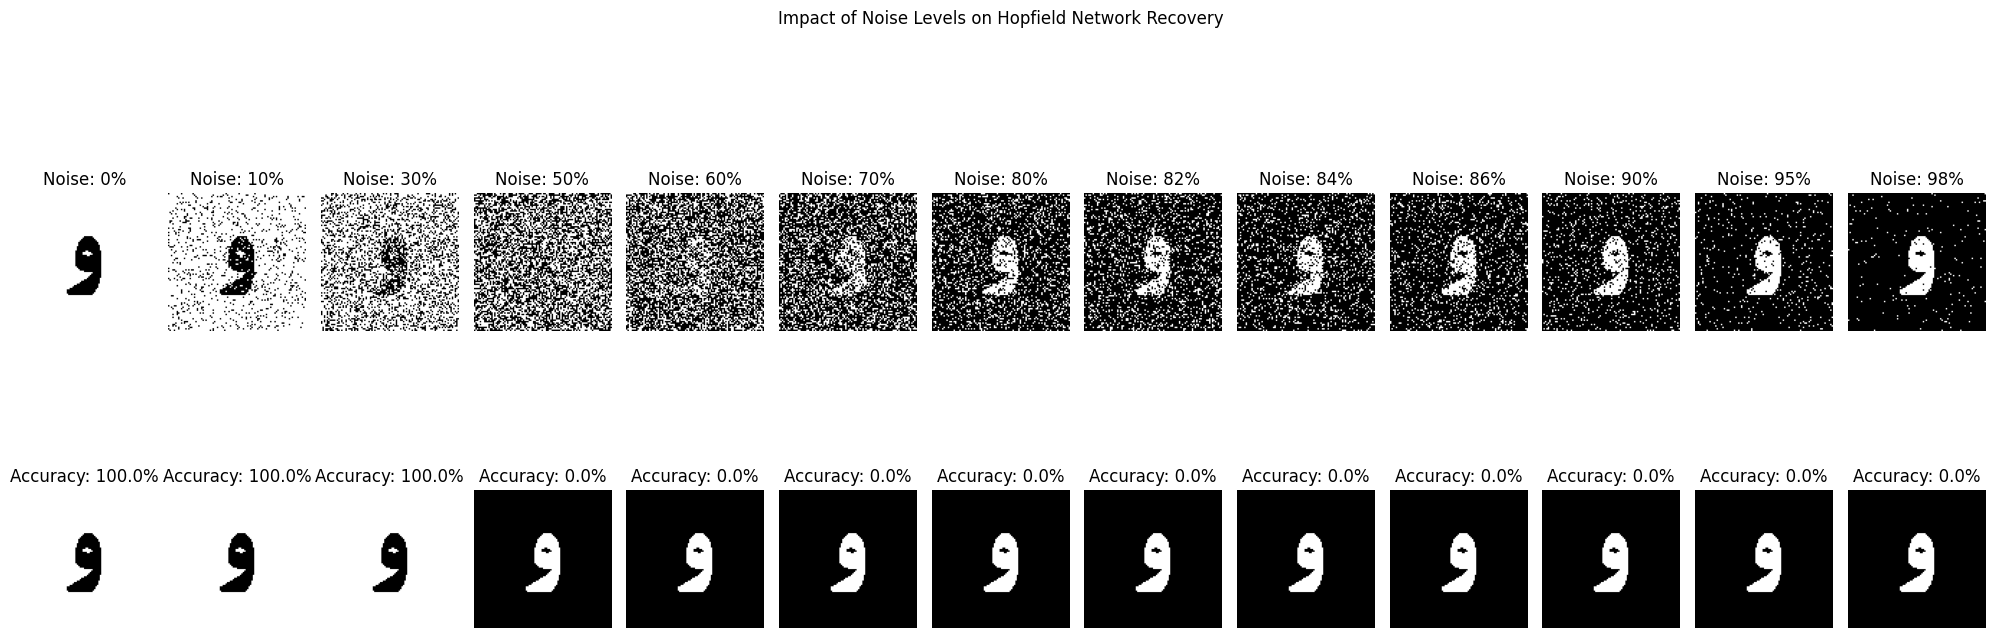

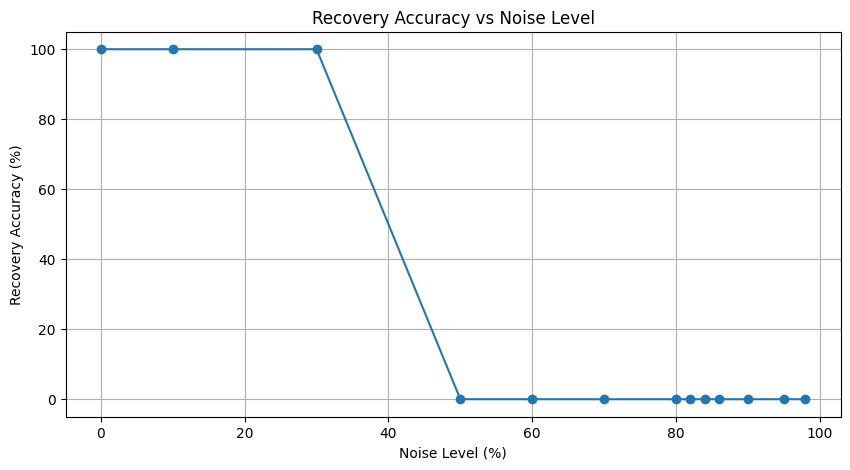

In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from typing import List

class HopfieldNetwork:
    def __init__(self, size: int):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns: List[np.ndarray]):
        for pattern in patterns:
            flat_pattern = pattern.flatten() * 2 - 1
            self.weights += np.outer(flat_pattern, flat_pattern)

        np.fill_diagonal(self.weights, 0)
        self.weights /= len(patterns)

    def update(self, pattern: np.ndarray, max_iterations: int = 100) -> np.ndarray:
        current = pattern.flatten() * 2 - 1
        for _ in range(max_iterations):
            previous = current.copy()
            for i in range(self.size):
                activation = np.dot(self.weights[i], current)
                current[i] = 1 if activation >= 0 else -1
            if np.array_equal(previous, current):
                break
        return (current + 1) // 2

def convert_image_to_binary(image: Image) -> np.ndarray:
    image = image.convert('L')
    binary_image = np.array(image) < 128
    return binary_image

def add_noise(pattern: np.ndarray, level: float) -> np.ndarray:
    noise = np.random.binomial(1, level, size=pattern.shape)
    return np.logical_xor(pattern, noise).astype(int)

def calculate_accuracy(original: np.ndarray, recovered: np.ndarray) -> float:
    return np.mean(original == recovered) * 100

def analyze_noise_impact(image_path: str, noise_levels: List[float]):
    # Load and process image
    image = Image.open(image_path)
    binary_image = convert_image_to_binary(image)

    # Initialize network
    network_size = binary_image.size
    network = HopfieldNetwork(np.prod(network_size))
    network.train([binary_image])

    # Prepare visualization
    n_levels = len(noise_levels)
    fig, axes = plt.subplots(2, n_levels, figsize=(20, 8))
    accuracies = []

    # Test each noise level
    for idx, noise_level in enumerate(noise_levels):
        # Add noise and recover
        noisy_image = add_noise(binary_image, noise_level)
        recovered_image = network.update(noisy_image)

        # Calculate accuracy
        accuracy = calculate_accuracy(binary_image.flatten(), recovered_image)
        accuracies.append(accuracy)

        # Visualize noisy images
        side_length = int(np.sqrt(binary_image.size))
        axes[0, idx].imshow(noisy_image.reshape((side_length, side_length)), cmap='binary')
        axes[0, idx].set_title(f'Noise: {noise_level*100:.0f}%')
        axes[0, idx].axis('off')

        # Visualize recovered images
        axes[1, idx].imshow(recovered_image.reshape((side_length, side_length)), cmap='binary')
        axes[1, idx].set_title(f'Accuracy: {accuracy:.1f}%')
        axes[1, idx].axis('off')

    plt.suptitle('Impact of Noise Levels on Hopfield Network Recovery')
    plt.tight_layout()
    plt.show()

    # Plot accuracy trend
    plt.figure(figsize=(10, 5))
    plt.plot(np.array(noise_levels) * 100, accuracies, '-o')
    plt.xlabel('Noise Level (%)')
    plt.ylabel('Recovery Accuracy (%)')
    plt.title('Recovery Accuracy vs Noise Level')
    plt.grid(True)
    plt.show()

    return accuracies

# Define image paths
image_paths = ["/content/1.jpg", "/content/2.jpg", "/content/3.jpg", "/content/4.jpg", "/content/5.jpg"]

# Test with different noise levels
noise_levels = [0,0.1, 0.3,0.5,0.6,0.7, 0.8,0.82,0.84,0.86, 0.9,0.95,0.98]
for image_path in image_paths:
    print(f"\nAnalyzing image: {image_path}")
    accuracies = analyze_noise_impact(image_path, noise_levels)


ادامه سوال سوم قسمت 2Q3-PART2
در این قسمت یک براورد کلی بر روی عملکرد سیستم با افزایش نویز داریم

Testing noise level: 0.00
Average accuracy at noise level 0.00: 94.92%
Testing noise level: 0.10
Average accuracy at noise level 0.10: 94.92%
Testing noise level: 0.20
Average accuracy at noise level 0.20: 94.92%
Testing noise level: 0.30
Average accuracy at noise level 0.30: 94.92%
Testing noise level: 0.40
Average accuracy at noise level 0.40: 94.92%
Testing noise level: 0.50
Average accuracy at noise level 0.50: 23.25%
Testing noise level: 0.60
Average accuracy at noise level 0.60: 5.08%
Testing noise level: 0.70
Average accuracy at noise level 0.70: 5.08%
Testing noise level: 0.80
Average accuracy at noise level 0.80: 5.08%
Testing noise level: 0.90
Average accuracy at noise level 0.90: 5.08%


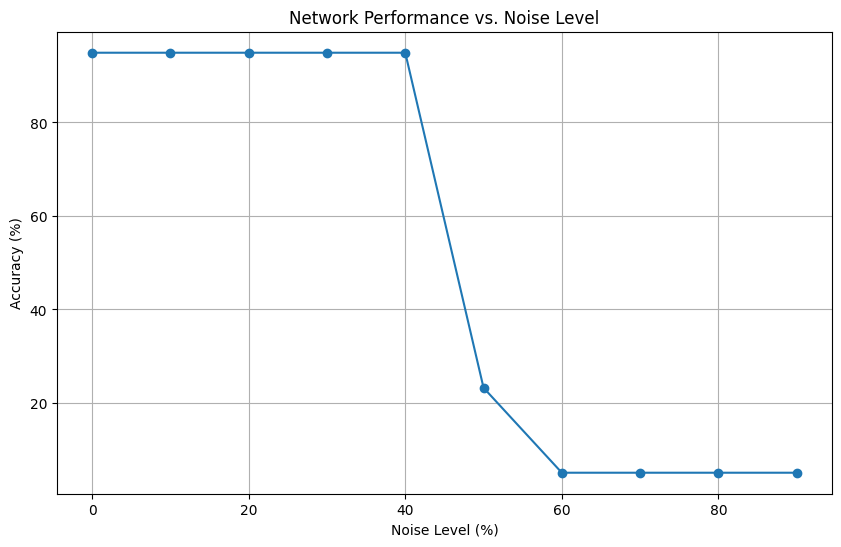

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from typing import List


class HopfieldNetwork:
    def __init__(self, size: int):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns: List[np.ndarray]):
        for pattern in patterns:
            normalized_pattern = pattern.flatten() * 2 - 1  # Convert to {-1, 1}
            self.weights += np.outer(normalized_pattern, normalized_pattern)
        np.fill_diagonal(self.weights, 0)
        self.weights /= len(patterns)

    def recall(self, noisy_pattern: np.ndarray, max_iter: int = 100) -> np.ndarray:
        state = noisy_pattern.flatten() * 2 - 1  # Convert to {-1, 1}
        for _ in range(max_iter):
            previous_state = state.copy()
            for i in range(self.size):
                activation = np.dot(self.weights[i], state)
                state[i] = 1 if activation >= 0 else -1
            if np.array_equal(state, previous_state):
                break
        return (state + 1) // 2  # Convert back to {0, 1}


def convert_image_to_binary(image: Image, threshold: int = 128) -> np.ndarray:
    grayscale_image = image.convert("L")
    binary_image = np.array(grayscale_image) < threshold
    return binary_image.astype(int)


def add_noise(pattern: np.ndarray, noise_level: float) -> np.ndarray:
    noise = np.random.rand(*pattern.shape) < noise_level
    return np.logical_xor(pattern, noise).astype(int)


def evaluate_network_performance(
    patterns: List[np.ndarray], max_noise: float, step: float, image_shape: tuple
):
    # Initialize Hopfield Network
    network_size = patterns[0].size
    hopfield_net = HopfieldNetwork(network_size)
    hopfield_net.train(patterns)

    noise_levels = np.arange(0, max_noise + step, step)
    accuracies = []

    for noise_level in noise_levels:
        print(f"Testing noise level: {noise_level:.2f}")
        total_accuracy = []

        for pattern in patterns:
            noisy_pattern = add_noise(pattern, noise_level)
            recovered_pattern = hopfield_net.recall(noisy_pattern)
            accuracy = np.mean(pattern.flatten() == recovered_pattern.flatten()) * 100
            total_accuracy.append(accuracy)

        average_accuracy = np.mean(total_accuracy)
        accuracies.append(average_accuracy)
        print(f"Average accuracy at noise level {noise_level:.2f}: {average_accuracy:.2f}%")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(noise_levels * 100, accuracies, marker="o")
    plt.xlabel("Noise Level (%)")
    plt.ylabel("Accuracy (%)")
    plt.title("Network Performance vs. Noise Level")
    plt.grid(True)
    plt.show()

    return accuracies


# Load example patterns (replace with your paths)
image_paths = ["/content/1.jpg", "/content/2.jpg", "/content/3.jpg", "/content/4.jpg", "/content/5.jpg"]
patterns = [convert_image_to_binary(Image.open(path), threshold=128) for path in image_paths]

# Evaluate network performance
accuracies = evaluate_network_performance(
    patterns, max_noise=0.9, step=0.1, image_shape=patterns[0].shape
)


Q3-PART3


Analyzing: /content/1.jpg


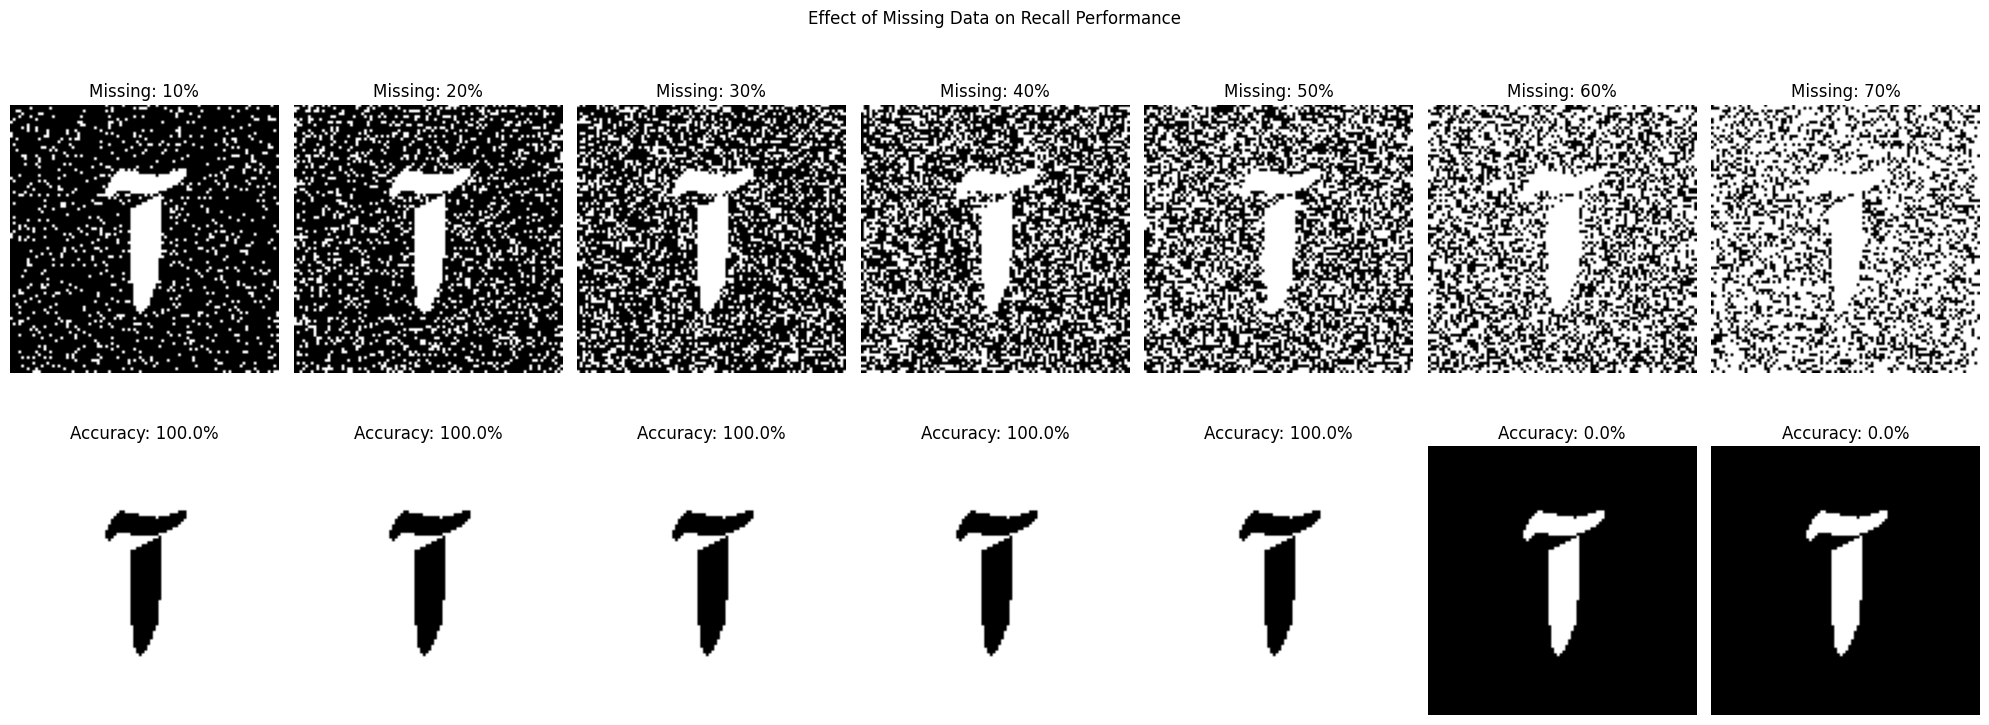

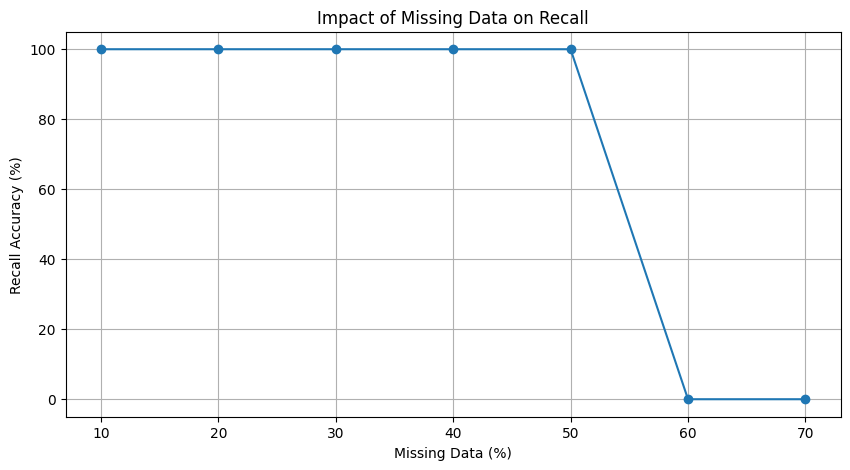


Analyzing: /content/2.jpg


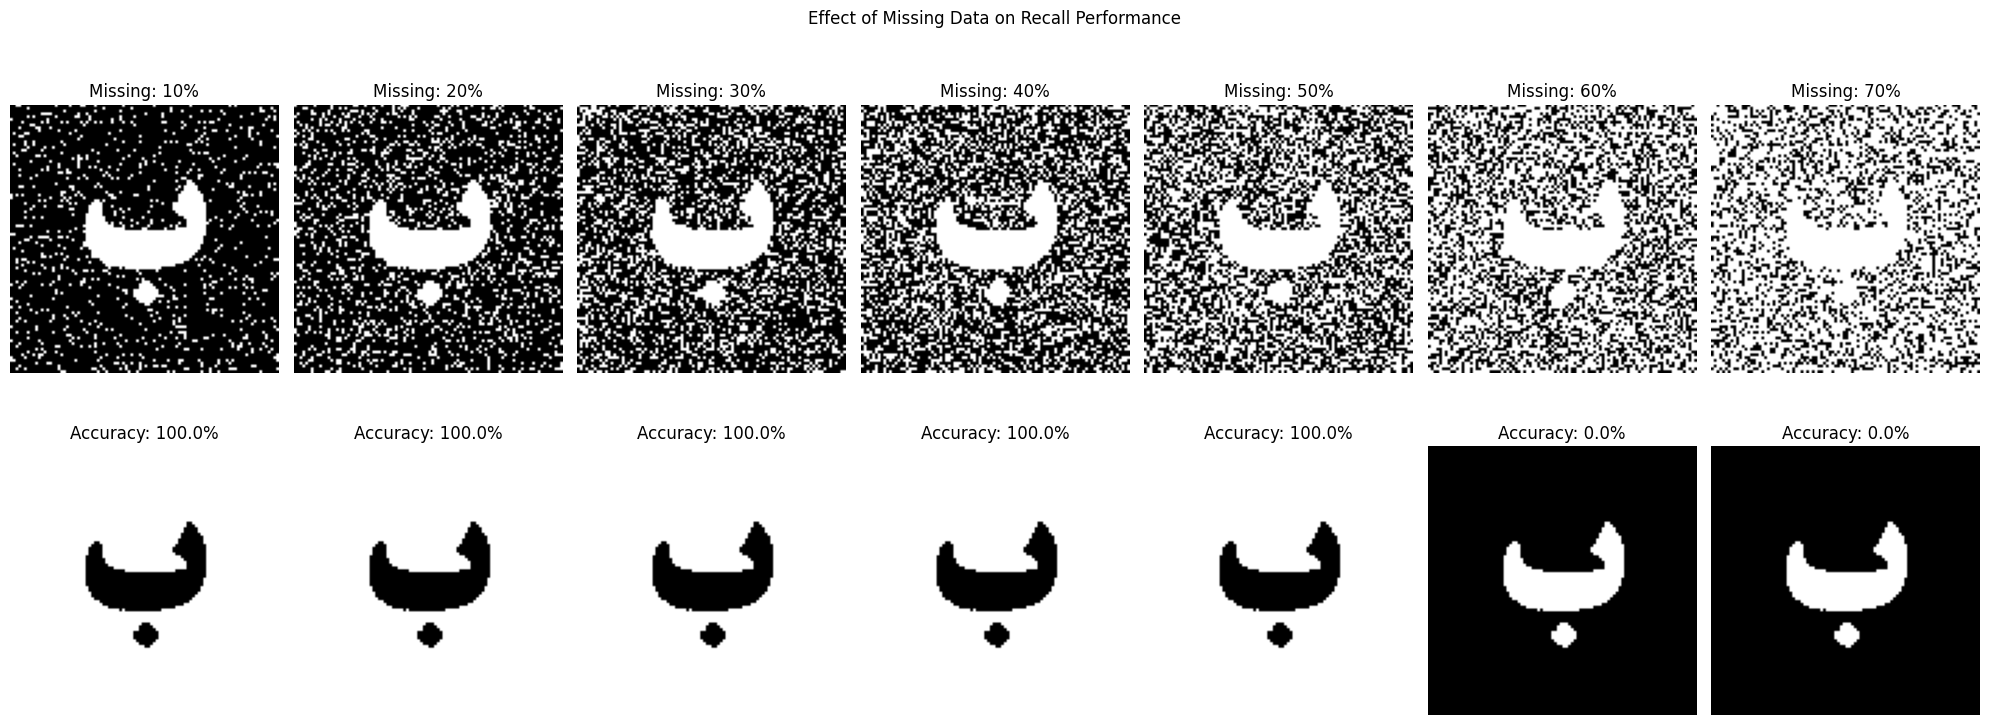

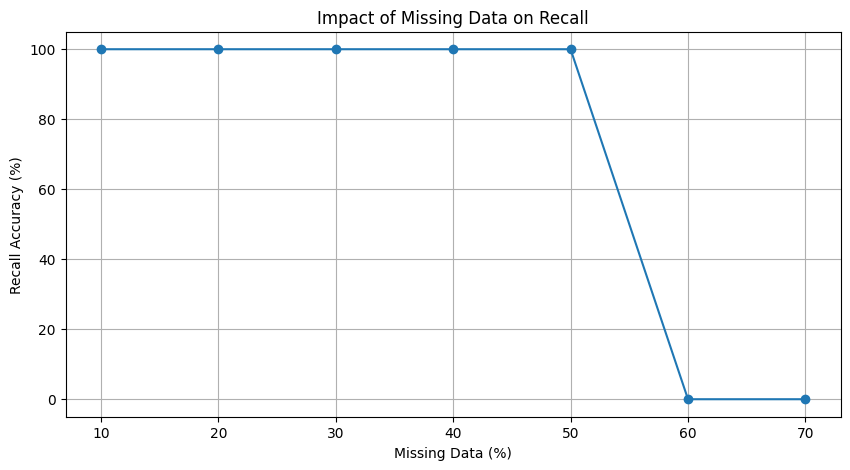


Analyzing: /content/3.jpg


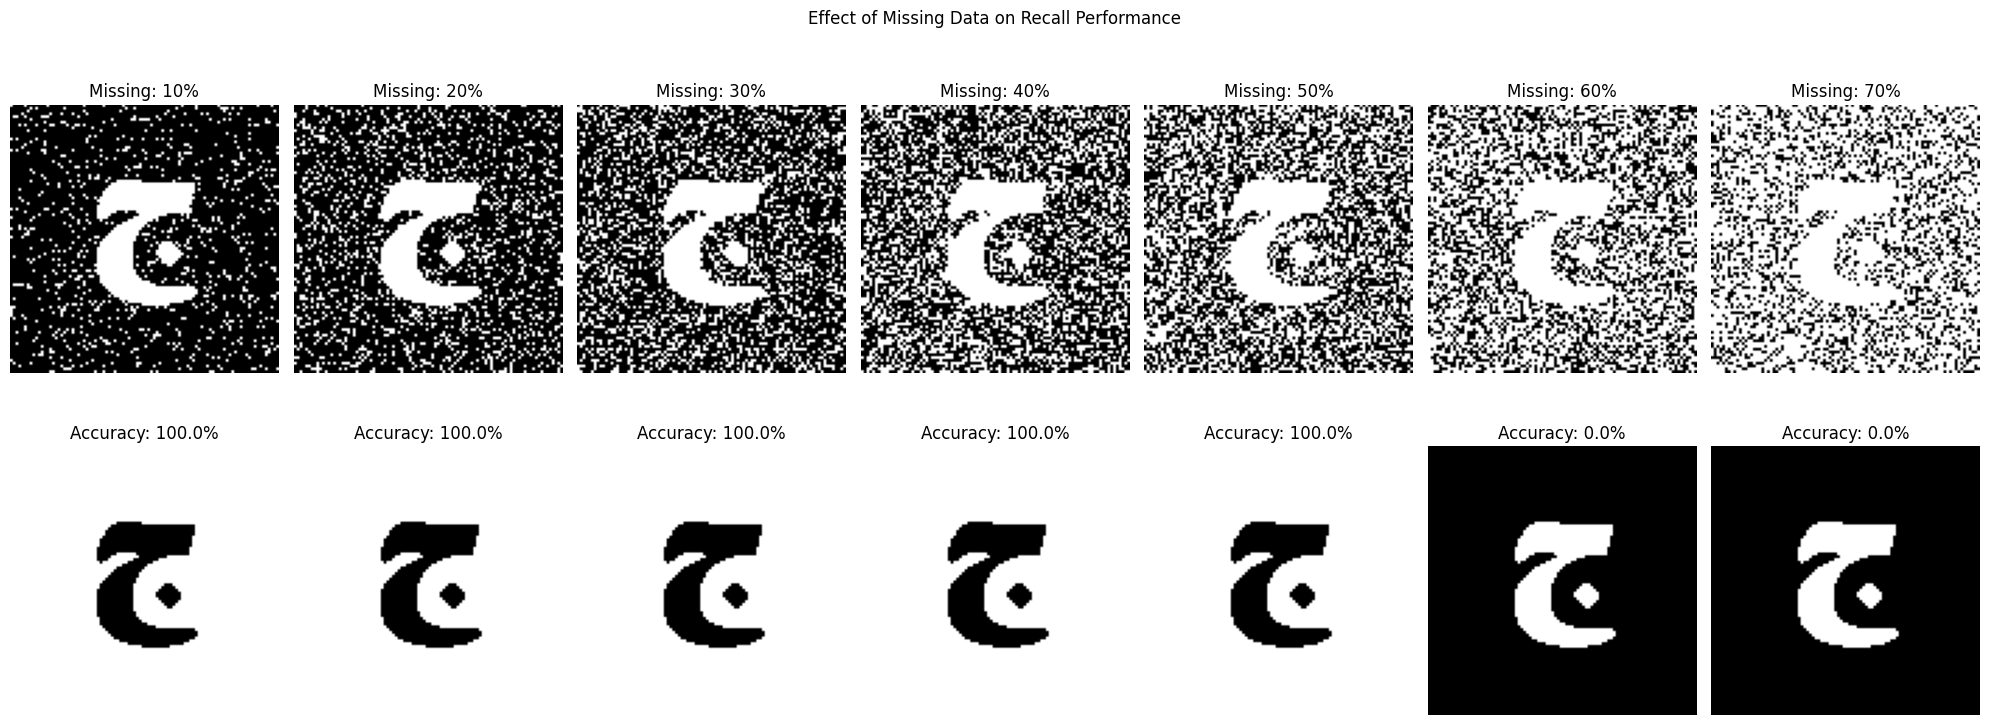

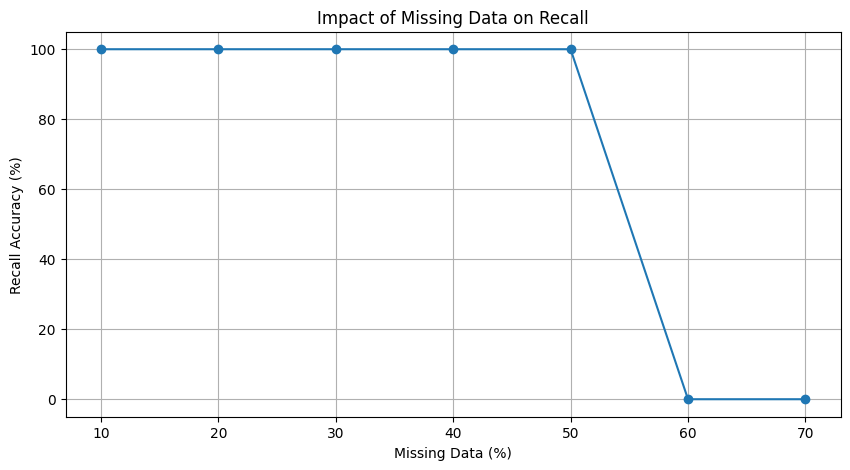


Analyzing: /content/4.jpg


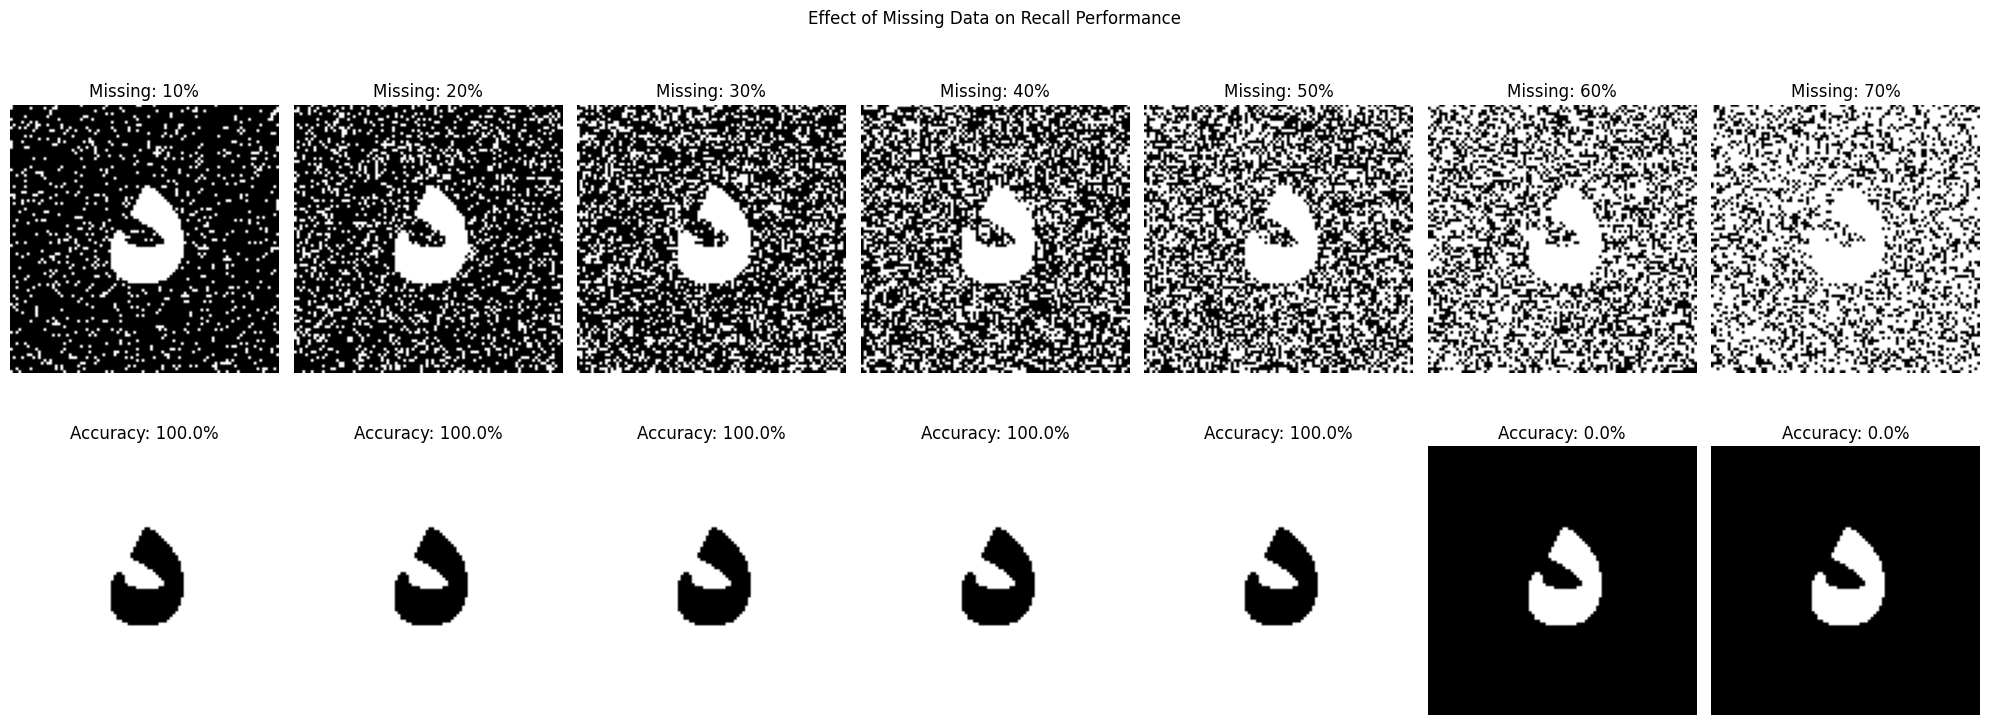

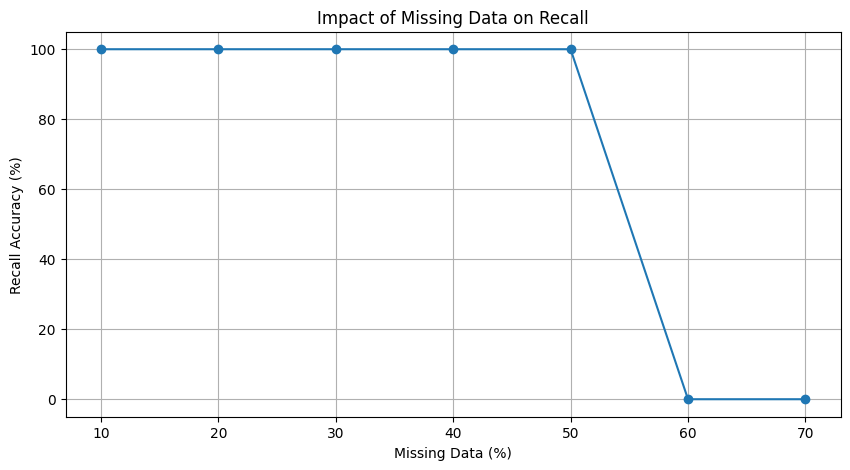


Analyzing: /content/5.jpg


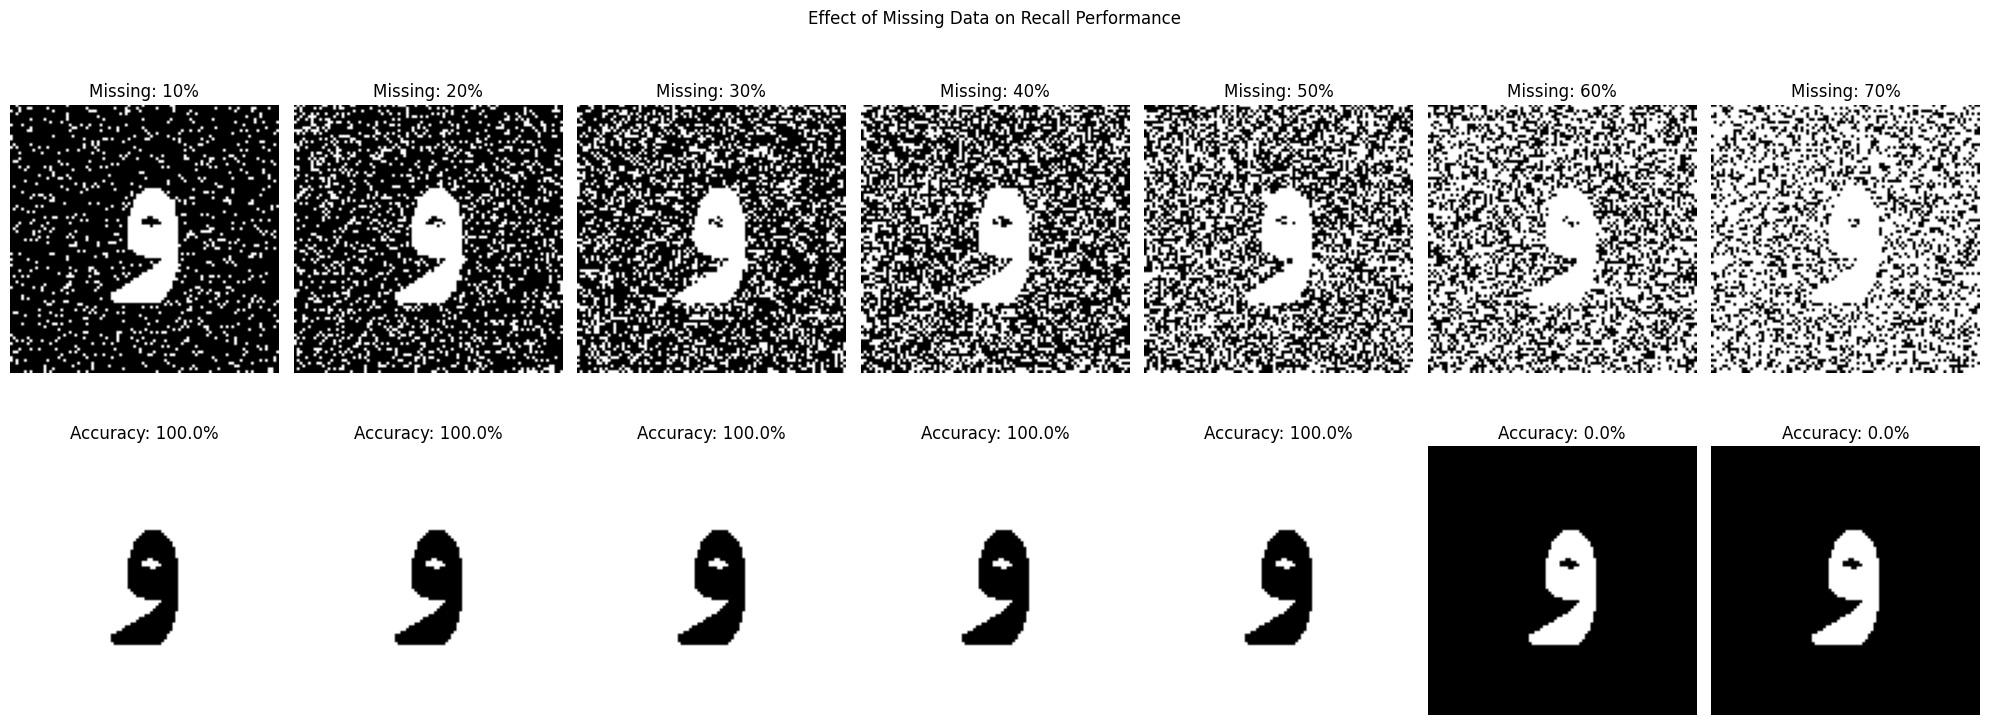

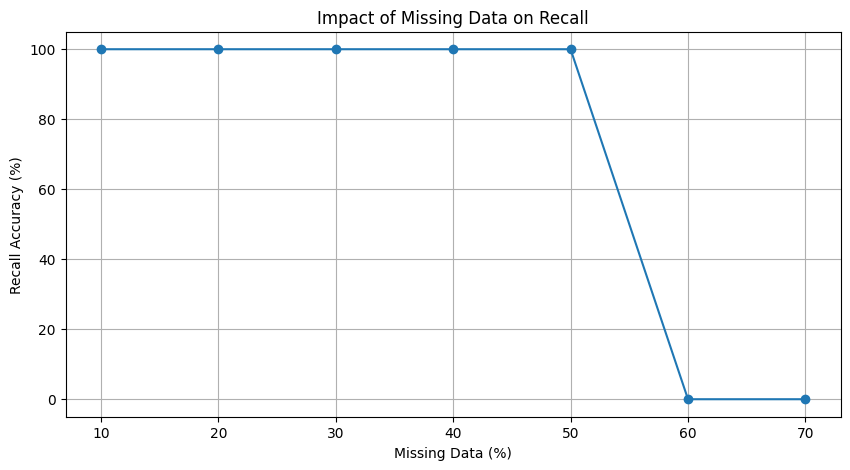

In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from typing import List


class AssociativeMemory:
    def __init__(self, dimension: int):
        self.dimension = dimension
        self.weight_matrix = np.zeros((dimension, dimension))

    def learn_patterns(self, patterns: List[np.ndarray]):
        for pat in patterns:
            normalized_pattern = pat.flatten() * 2 - 1
            self.weight_matrix += np.outer(normalized_pattern, normalized_pattern)

        np.fill_diagonal(self.weight_matrix, 0)
        self.weight_matrix /= len(patterns)

    def recall(self, input_pattern: np.ndarray, max_iters: int = 100) -> np.ndarray:
        state = input_pattern.flatten() * 2 - 1
        for _ in range(max_iters):
            previous_state = state.copy()
            for idx in range(self.dimension):
                weighted_sum = np.dot(self.weight_matrix[idx], state)
                state[idx] = 1 if weighted_sum >= 0 else -1
            if np.array_equal(previous_state, state):
                break
        return (state + 1) // 2


def process_image_to_binary(image: Image) -> np.ndarray:
    grayscale_image = image.convert('L')
    binary_data = np.array(grayscale_image) < 128
    return binary_data


def introduce_missing_data(input_pattern: np.ndarray, missing_rate: float) -> np.ndarray:
    """Simulate missing data by introducing noise at the given rate."""
    noise_mask = np.random.random(input_pattern.shape) < missing_rate
    corrupted_pattern = input_pattern.copy()
    corrupted_pattern[noise_mask] = 0.5  # Gray for missing data
    return corrupted_pattern


def compute_recall_accuracy(original: np.ndarray, restored: np.ndarray) -> float:
    """Evaluate recall accuracy by comparing restored data to the original."""
    return np.mean(original == restored) * 100


def visualize_missing_data_effect(image_path: str, missing_rates: List[float]):
    # Load and preprocess the image
    img = Image.open(image_path)
    binary_img = process_image_to_binary(img)

    # Initialize Hopfield-like network
    dimension = binary_img.size
    memory_model = AssociativeMemory(np.prod(dimension))
    memory_model.learn_patterns([binary_img])

    # Set up visualization
    num_rates = len(missing_rates)
    fig, ax = plt.subplots(2, num_rates, figsize=(20, 8))
    recovery_scores = []

    # Process each missing data rate
    for i, rate in enumerate(missing_rates):
        # Generate corrupted pattern and recover it
        corrupted_img = introduce_missing_data(binary_img, rate)
        restored_img = memory_model.recall(corrupted_img)

        # Compute recovery performance
        score = compute_recall_accuracy(binary_img.flatten(), restored_img)
        recovery_scores.append(score)

        # Visualize corrupted and restored images
        img_size = int(np.sqrt(binary_img.size))
        corrupted_display = corrupted_img.copy()
        corrupted_display[corrupted_img == 0.5] = 0.5  # Highlight missing regions

        ax[0, i].imshow(corrupted_display.reshape((img_size, img_size)), cmap='gray')
        ax[0, i].set_title(f'Missing: {rate*100:.0f}%')
        ax[0, i].axis('off')

        ax[1, i].imshow(restored_img.reshape((img_size, img_size)), cmap='binary')
        ax[1, i].set_title(f'Accuracy: {score:.1f}%')
        ax[1, i].axis('off')

    plt.suptitle('Effect of Missing Data on Recall Performance')
    plt.tight_layout()
    plt.show()

    # Plot accuracy results
    plt.figure(figsize=(10, 5))
    plt.plot(np.array(missing_rates) * 100, recovery_scores, '-o')
    plt.xlabel('Missing Data (%)')
    plt.ylabel('Recall Accuracy (%)')
    plt.title('Impact of Missing Data on Recall')
    plt.grid(True)
    plt.show()

    return recovery_scores


# Define levels of missing data and analyze
missing_data_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
for path in image_paths:
    print(f"\nAnalyzing: {path}")
    accuracy_results = visualize_missing_data_effect(path, missing_data_rates)


Q4-RBF


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# ----------------------
# گام 1: بارگیری و آماده‌سازی داده‌ها
# ----------------------
data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


# ----------------------
# گام 2: تعریف لایه‌ی RBF
# ----------------------
class RBFLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        # مراکز RBF (Centers)
        self.centers = nn.Parameter(
            torch.randn(out_features, in_features) * 0.1
        )

        # log_sigma (برای حفظ همواره مثبت بودن سیگما)
        self.log_sigma = nn.Parameter(
            torch.zeros(out_features)
        )

    def forward(self, x):
        x_expanded = x.unsqueeze(1)   # (batch_size, 1, in_features)
        centers_expanded = self.centers.unsqueeze(0)  # (1, out_features, in_features)
        dist_sq = torch.sum((x_expanded - centers_expanded)**2, dim=2)

        sigmas = torch.exp(self.log_sigma)  # (out_features,)
        sigmas_expanded = sigmas.unsqueeze(0)  # (1, out_features)

        basis_func = torch.exp(- dist_sq / (2 * sigmas_expanded**2))
        return basis_func

# ----------------------
# گام 3: مدل نهایی (RBF + Linear)
# ----------------------
class RBFNetwork(nn.Module):
    def __init__(self, in_features, n_centers):
        super().__init__()
        self.rbf = RBFLayer(in_features, n_centers)
        self.out = nn.Linear(n_centers, 1)

    def forward(self, x):
        rbf_out = self.rbf(x)
        output = self.out(rbf_out)
        return output

# ----------------------
# گام 4: آماده‌سازی دیتالودر، مدل، تابع هزینه و بهینه‌ساز
# ----------------------
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)

in_features = X_train_t.shape[1]
n_centers = 50
model = RBFNetwork(in_features, n_centers)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ----------------------
# گام 5: حلقه‌ی آموزش
# ----------------------
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    for batch_X, batch_y in train_loader:
        y_pred = model(batch_X)
        loss = criterion(y_pred, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * batch_X.size(0)

    epoch_loss /= len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}] - MSE: {epoch_loss:.4f}")

# ----------------------
# گام 6: ارزیابی روی تست
# ----------------------
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_t)
    test_mse = criterion(y_pred_test, y_test_t).item()
    print(f"Test MSE: {test_mse:.4f}")


Epoch [1/20] - MSE: 4.3899
Epoch [2/20] - MSE: 3.1221
Epoch [3/20] - MSE: 2.6449
Epoch [4/20] - MSE: 2.3438
Epoch [5/20] - MSE: 2.0791
Epoch [6/20] - MSE: 1.8391
Epoch [7/20] - MSE: 1.6236
Epoch [8/20] - MSE: 1.4364
Epoch [9/20] - MSE: 1.2776
Epoch [10/20] - MSE: 1.1460
Epoch [11/20] - MSE: 1.0377
Epoch [12/20] - MSE: 0.9501
Epoch [13/20] - MSE: 0.8787
Epoch [14/20] - MSE: 0.8203
Epoch [15/20] - MSE: 0.7715
Epoch [16/20] - MSE: 0.7303
Epoch [17/20] - MSE: 0.6952
Epoch [18/20] - MSE: 0.6644
Epoch [19/20] - MSE: 0.6383
Epoch [20/20] - MSE: 0.6147
Test MSE: 0.6142


Q4-DENSE


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def main():
    # 1) بارگیری دیتاست
    housing = fetch_california_housing()
    X = housing.data  # ویژگی‌ها
    y = housing.target  # برچسب (قیمت)

    # 2) تقسیم داده به آموزش و تست
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=23

    )

    # 3) استانداردسازی (پیشنهاد می‌شود در رگرسیون)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4) تعریف مدل (شبکه‌ی عصبی با لایه‌های Dense)
    model = keras.Sequential([
        # لایه‌ی ورودی + مخفی: تعداد نورون‌ها دلخواه (مثلاً 64)، تابع فعال‌سازی ReLU
        layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        # لایه‌ی مخفی دوم (اختیاری)
        layers.Dense(32, activation='relu'),
        # لایه‌ی خروجی (یک نورون برای رگرسیون)
        layers.Dense(1)
    ])

    # 5) کامپایل مدل: از MSE به عنوان Loss و از Adam به عنوان Optimizer
    model.compile(
        loss='mean_squared_error',
        optimizer=keras.optimizers.Adam(learning_rate=0.001)
    )

    # 6) آموزش مدل
    history = model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,   # می‌توان بخشی از داده را برای اعتبارسنجی جدا کرد
        epochs=20,
        batch_size=64,
        verbose=1
    )

    # 7) ارزیابی مدل روی تست
    mse_test = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"Test MSE: {mse_test:.4f}")

    # 8) پیش‌بینی روی داده‌ی تست (اختیاری)
    y_pred = model.predict(X_test_scaled)
    print("Some predictions:", y_pred[:5].flatten())
    print("Real values:", y_test[:5])

if __name__ == "__main__":
    main()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3351 - val_loss: 0.5638
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4989 - val_loss: 0.4334
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3918 - val_loss: 0.4110
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3614 - val_loss: 0.4057
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3519 - val_loss: 0.3925
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3498 - val_loss: 0.3861
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3505 - val_loss: 0.3743
Epoch 8/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3363 - val_loss: 0.3712
Epoch 9/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3193 - val_loss: 0.3568
Epoch 10/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3204 - val_loss: 0.3554
Epoch 11/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3095 - val_loss: 0.3547
Epoch 12/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.